In [2]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
import coral_ordinal as coral

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import insightface
from insightface.app import FaceAnalysis
from insightface.data import get_image as ins_get_image
from scipy import special
import pandas as pd
import numpy as np
import cv2
import os


gpus = tensorflow.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tensorflow.config.experimental.set_memory_growth(gpu, True)

2022-04-20 13:48:51.973499: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2022-04-20 13:48:51.992485: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: 
pciBusID: 0000:8b:00.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2022-04-20 13:48:51.992711: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2022-04-20 13:48:51.994150: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2022-04-20 13:48:51.995482: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10
2022-04-20 13:48:51.995733: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcurand.so.10
2022-04-

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
model ignore: /home/yandex/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/yandex/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/yandex/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
model ignore: /home/yandex/.insightface/models/buffalo_l/genderage.onnx genderage
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
model ignore: /home/yandex/.insightface/models/buffalo_l/w600k_r50.onnx recognition
set det-size: (128, 128)


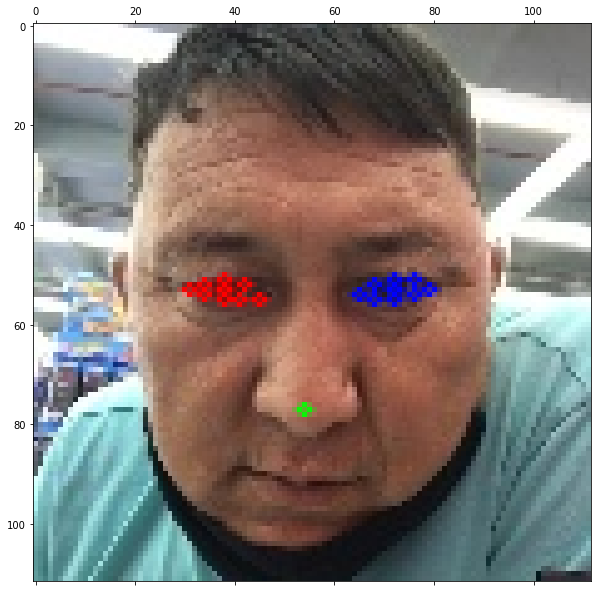

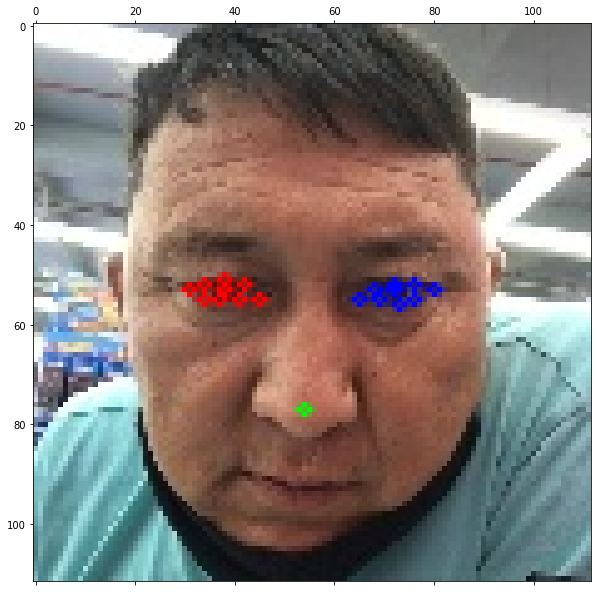

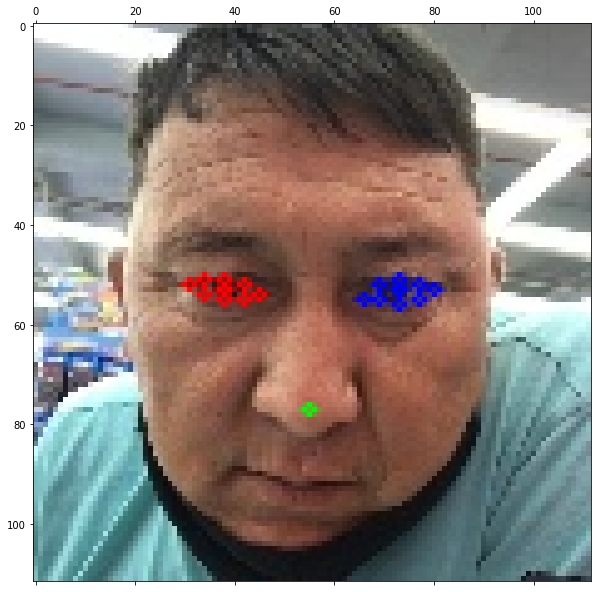

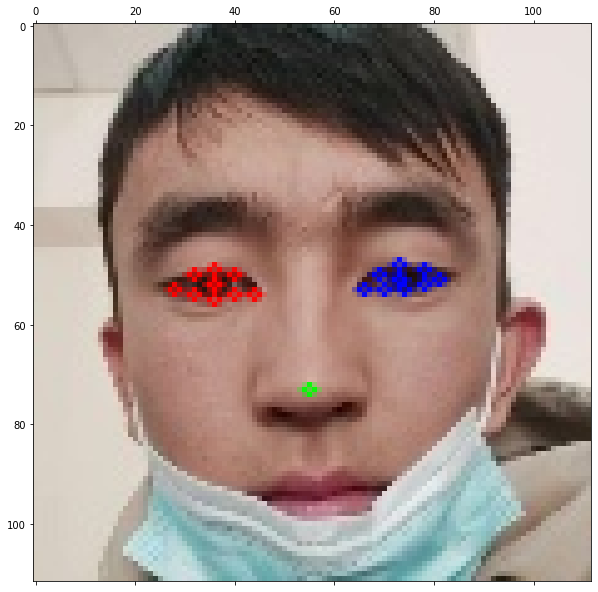

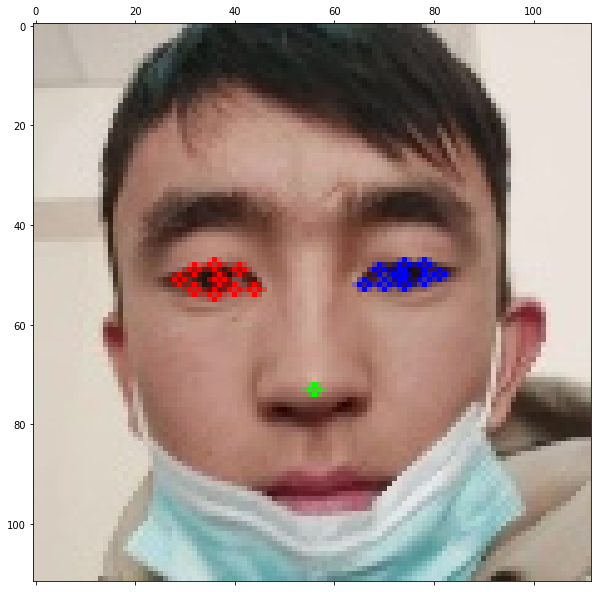

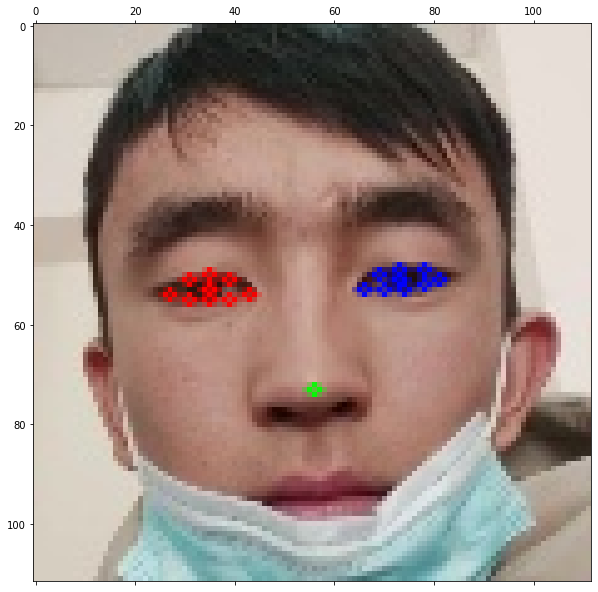

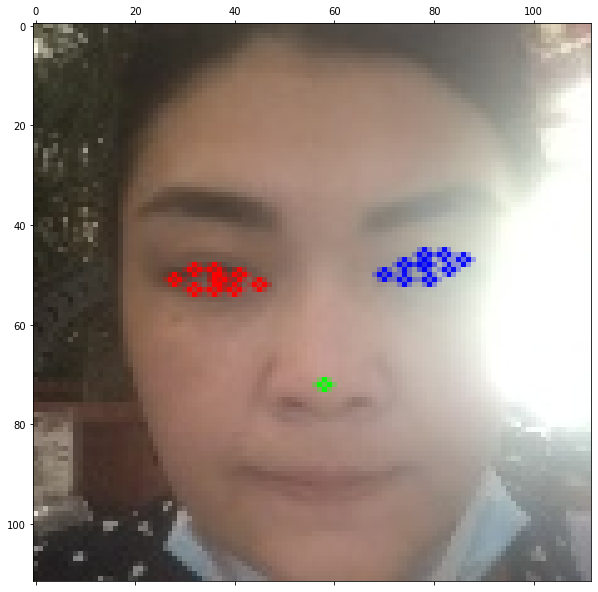

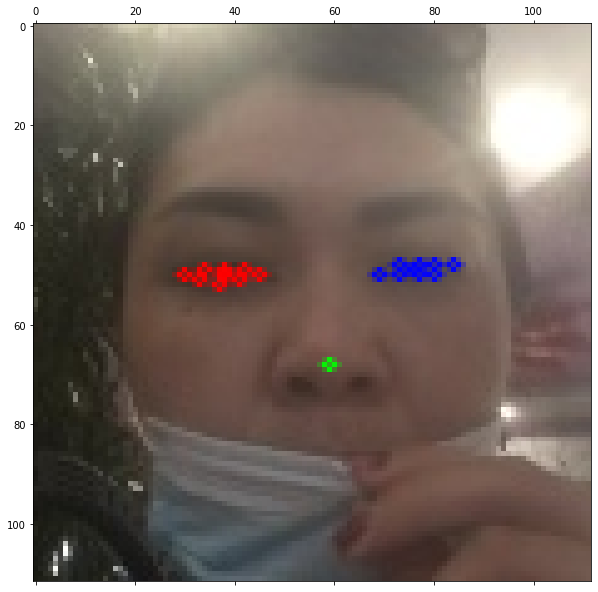

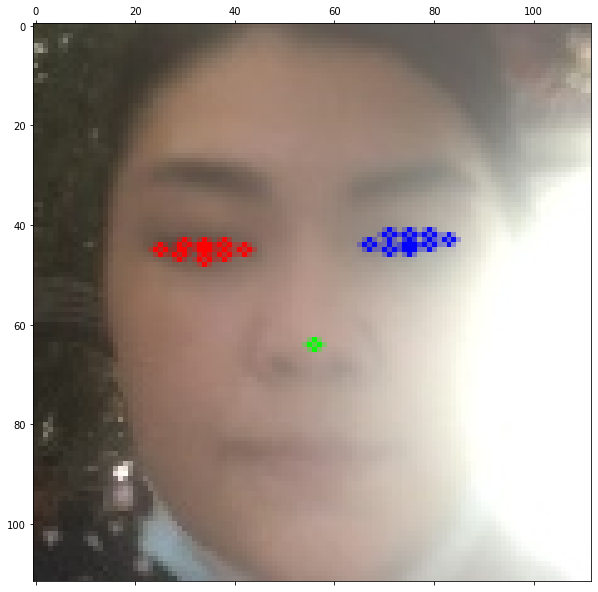

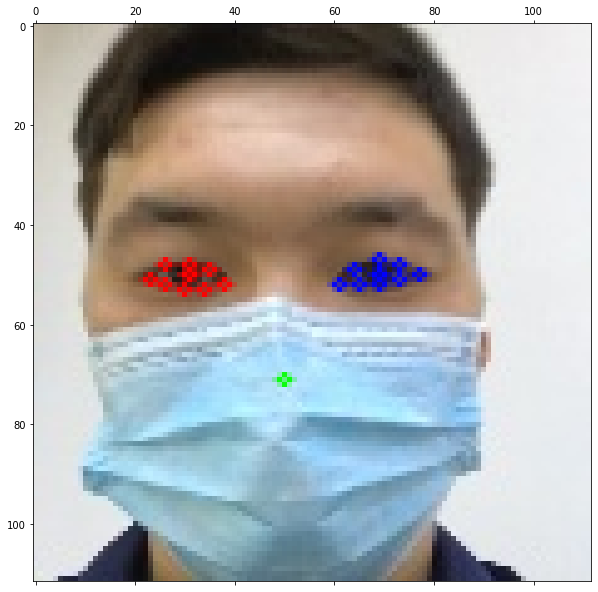

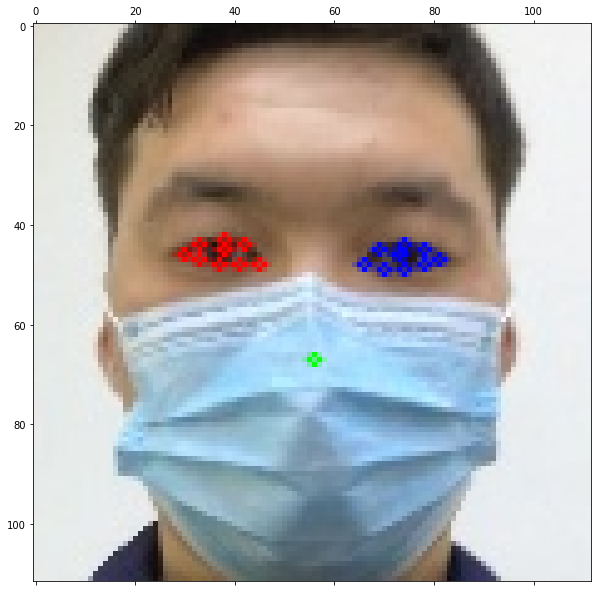

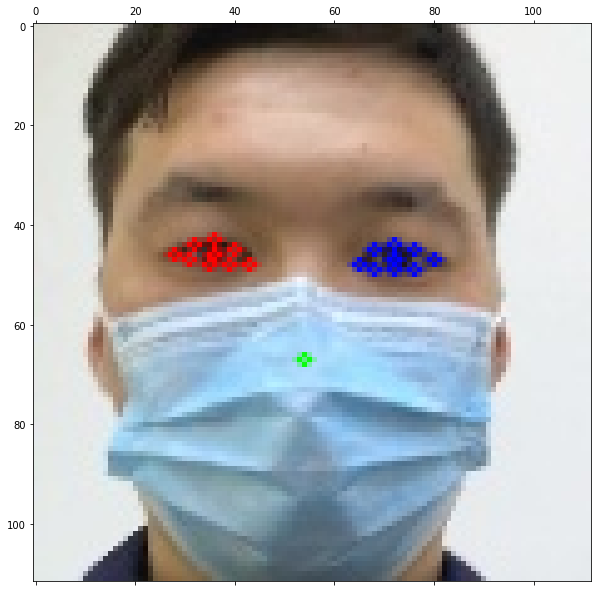

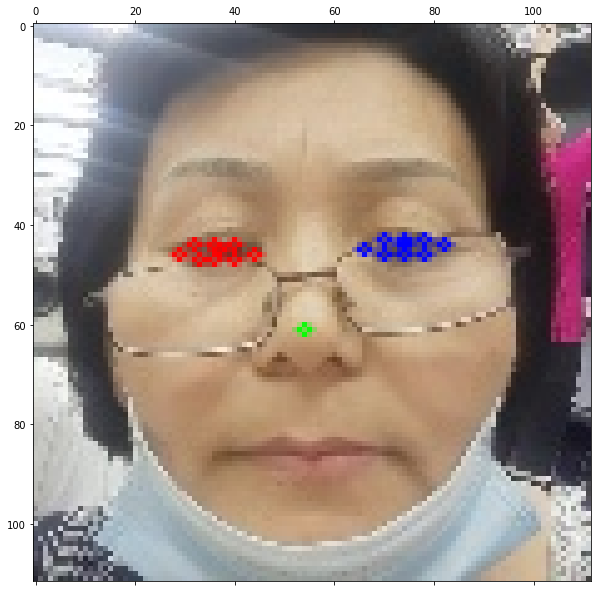

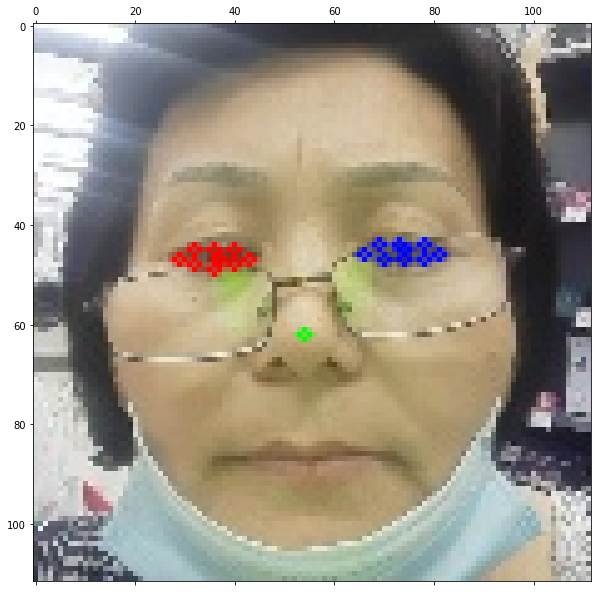

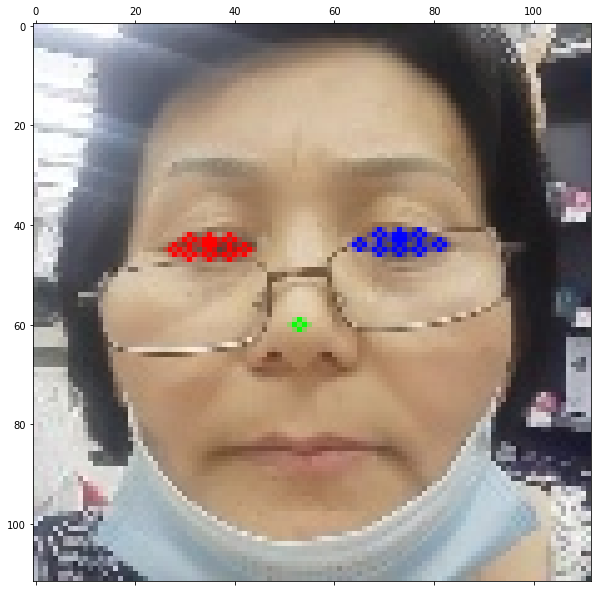

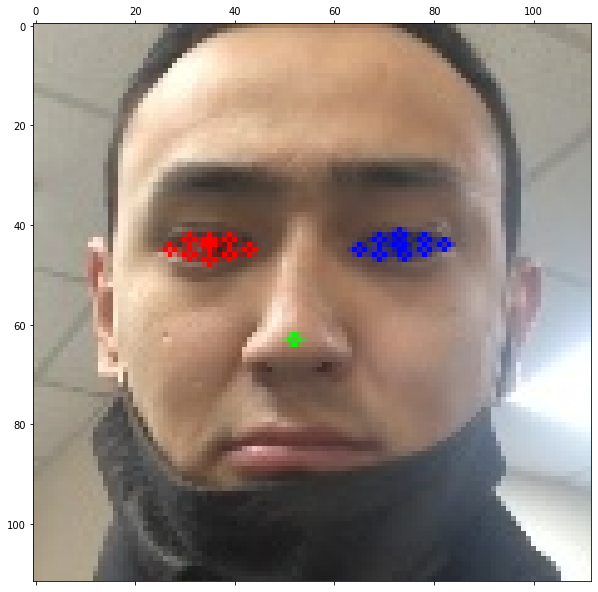

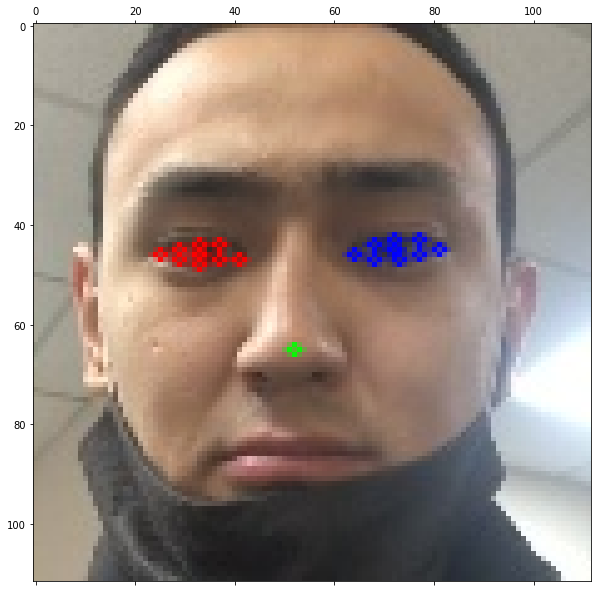

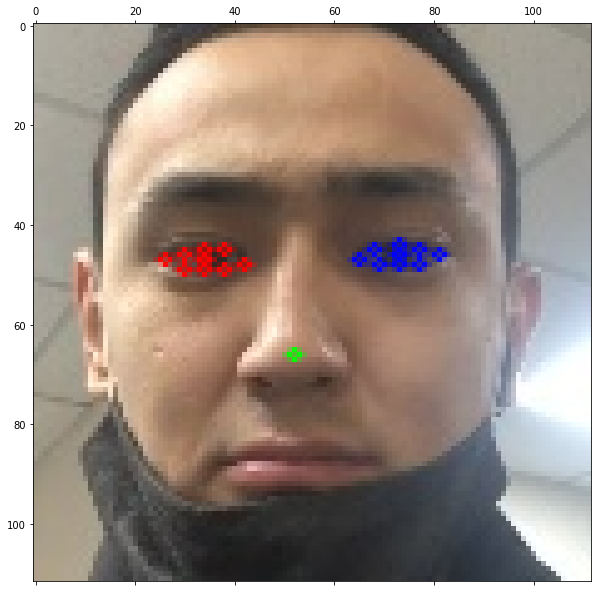

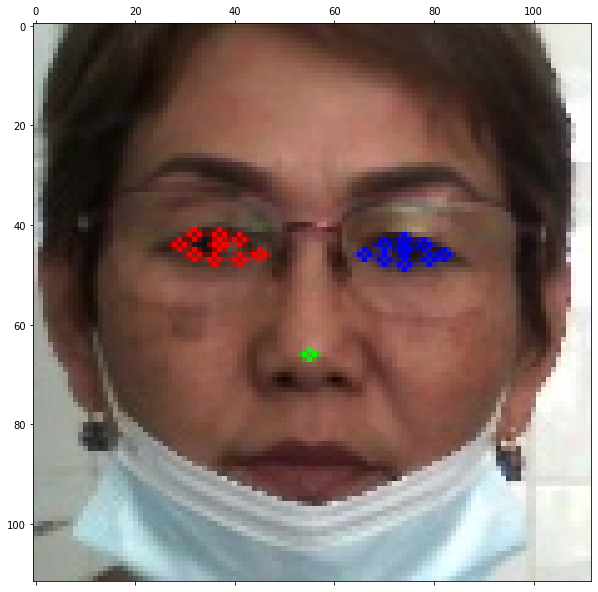

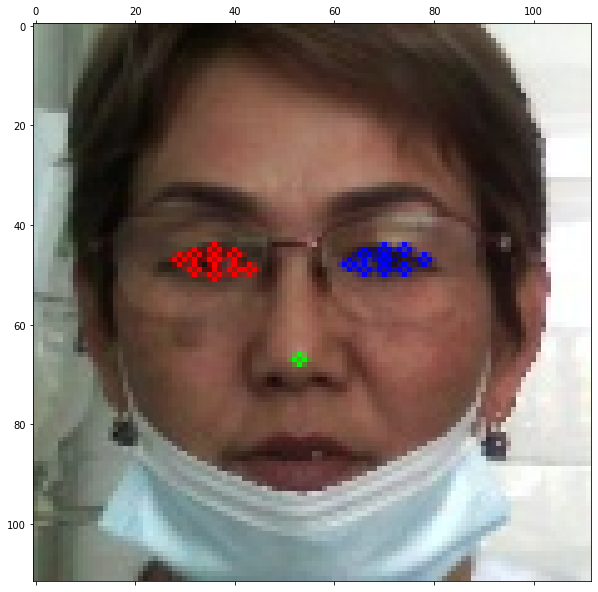

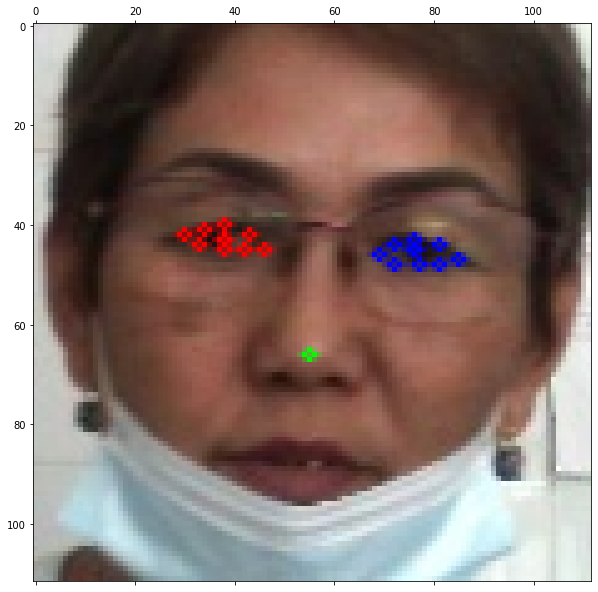

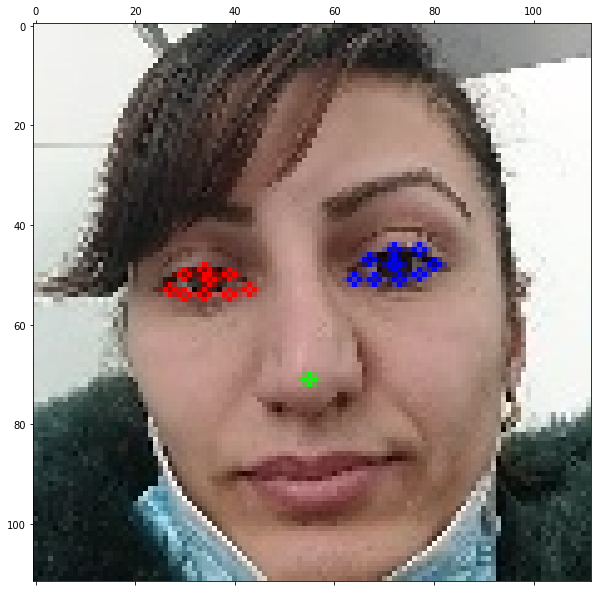

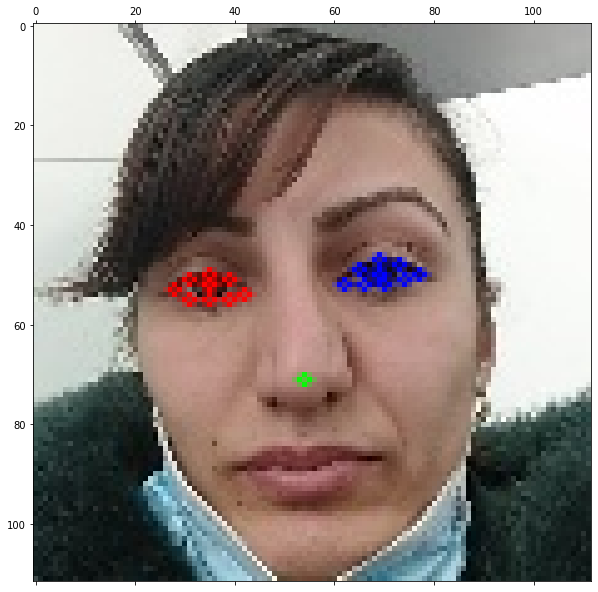

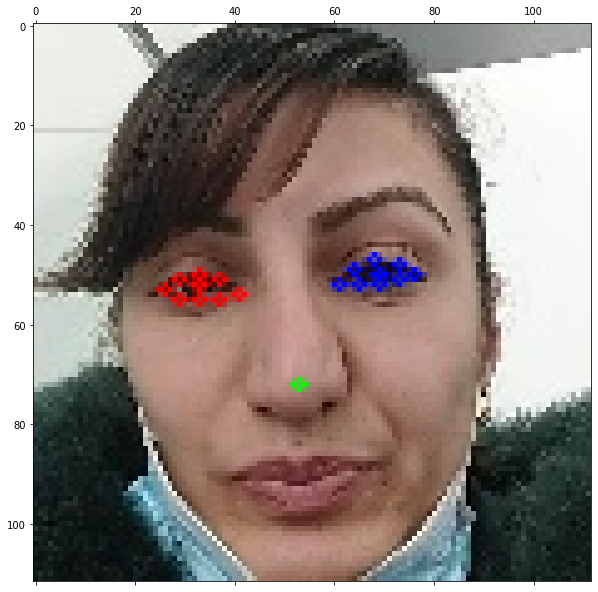

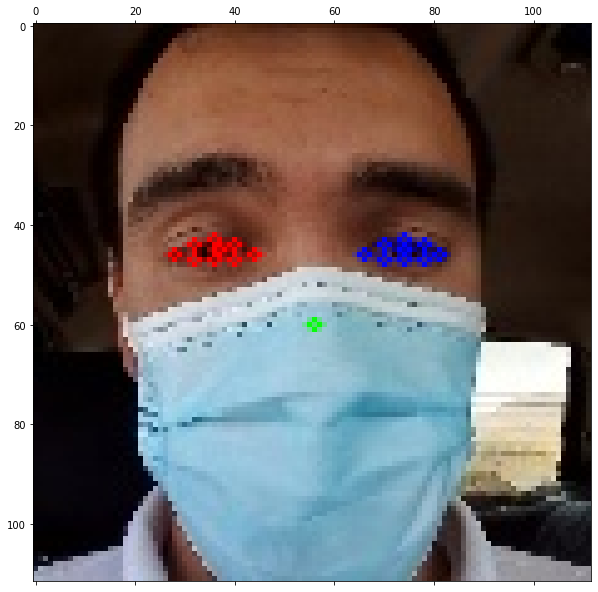

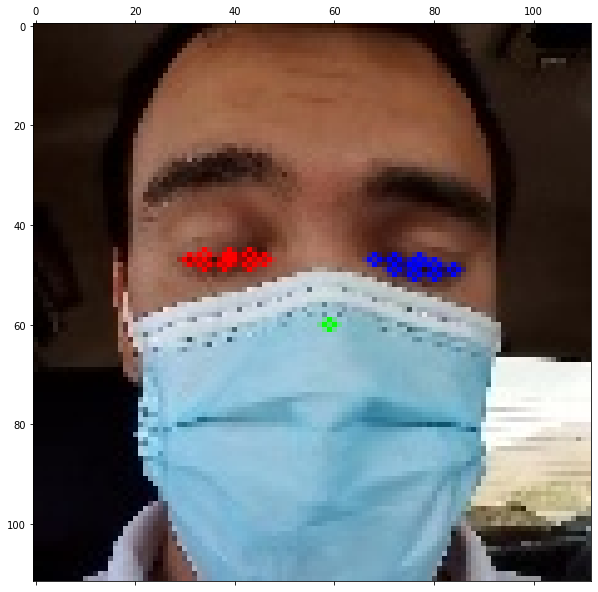

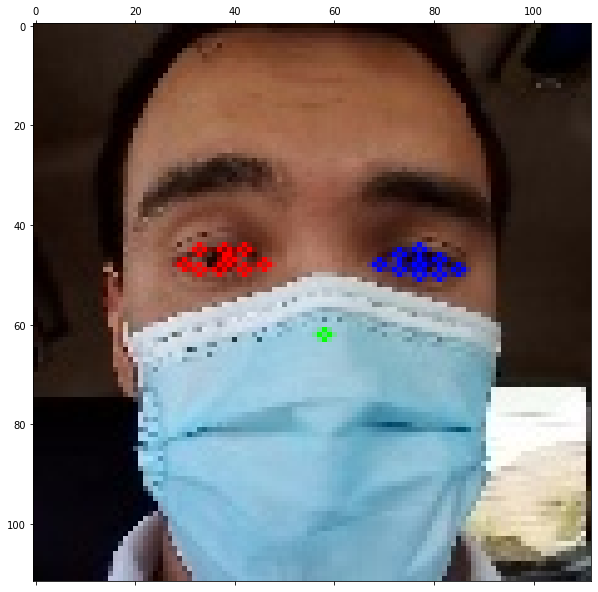

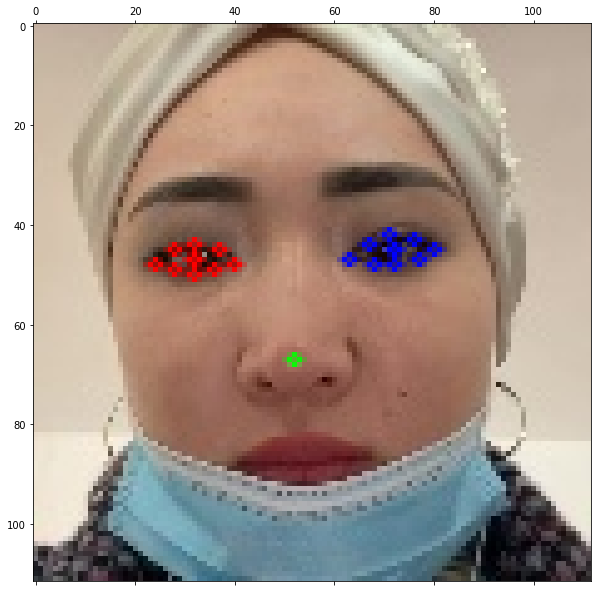

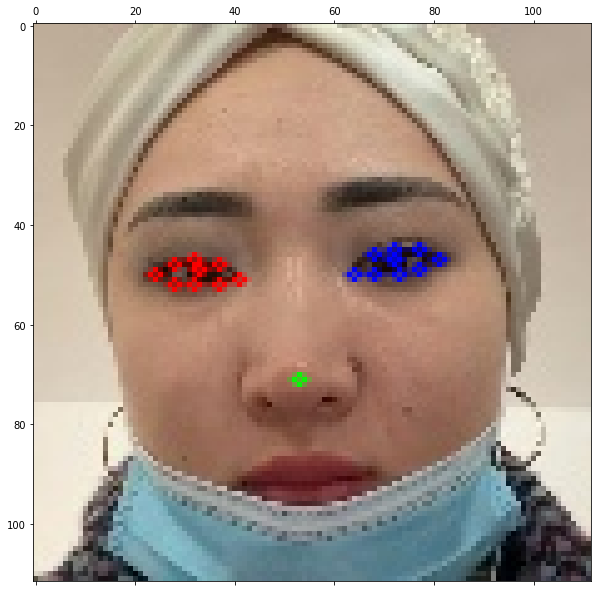

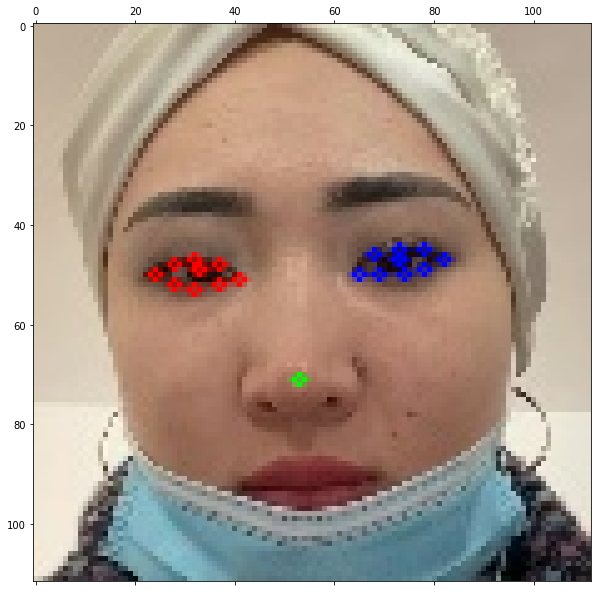

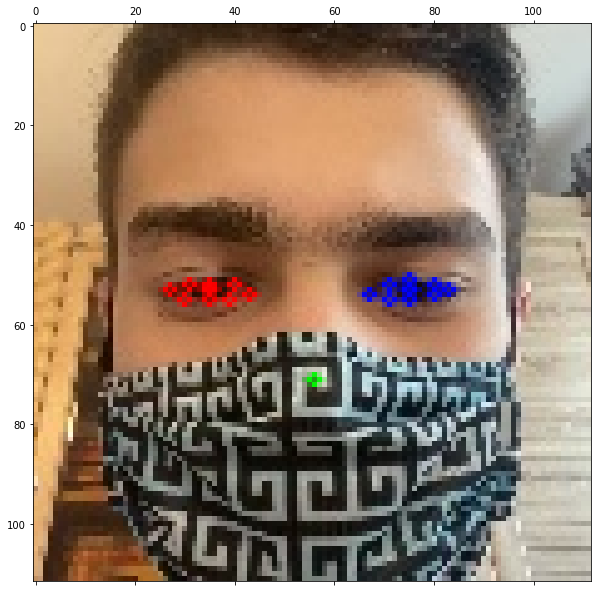

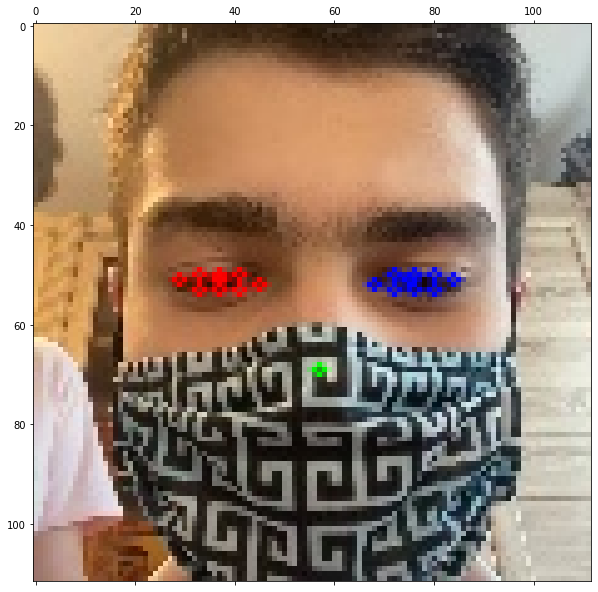

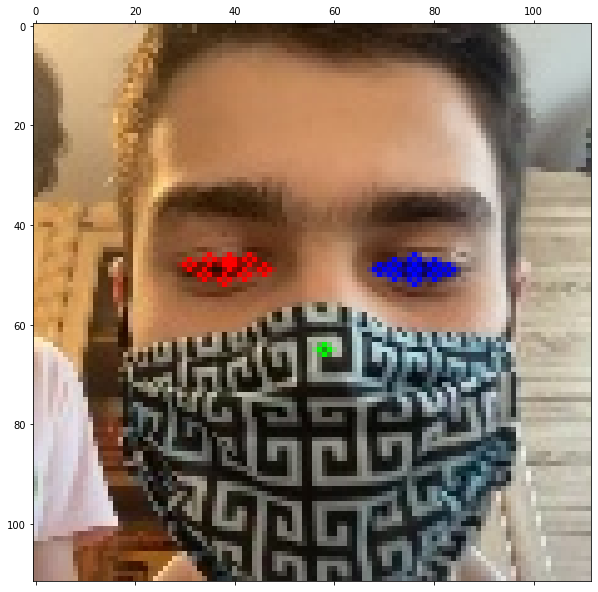

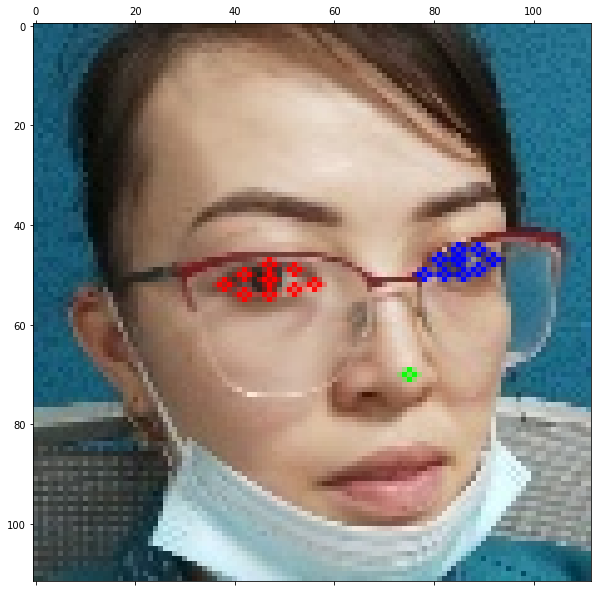

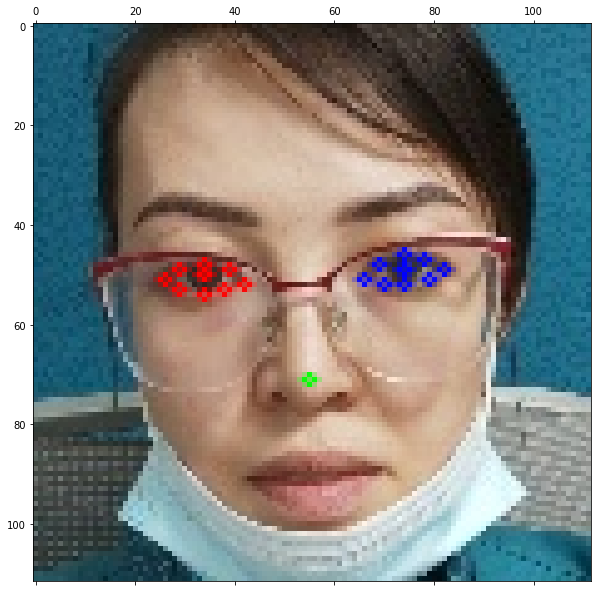

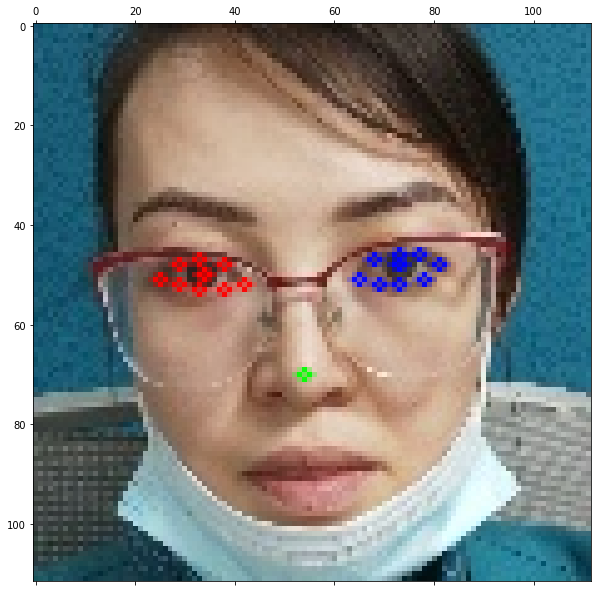

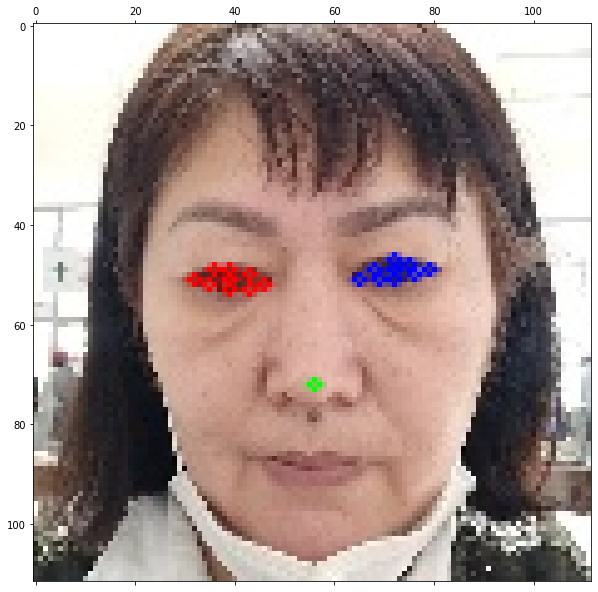

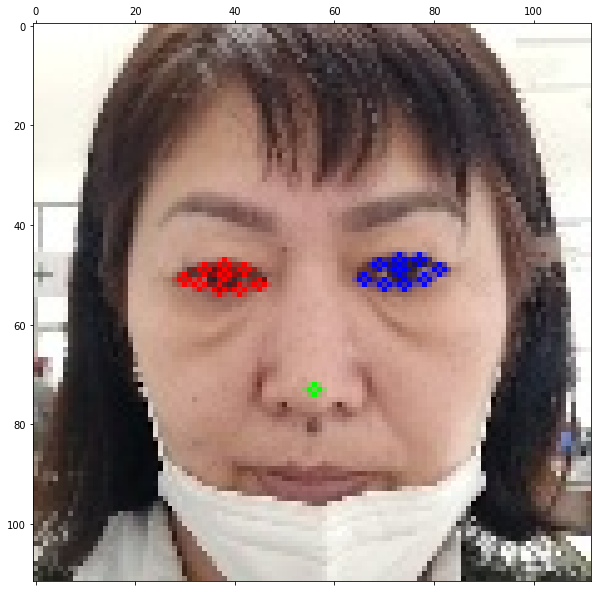

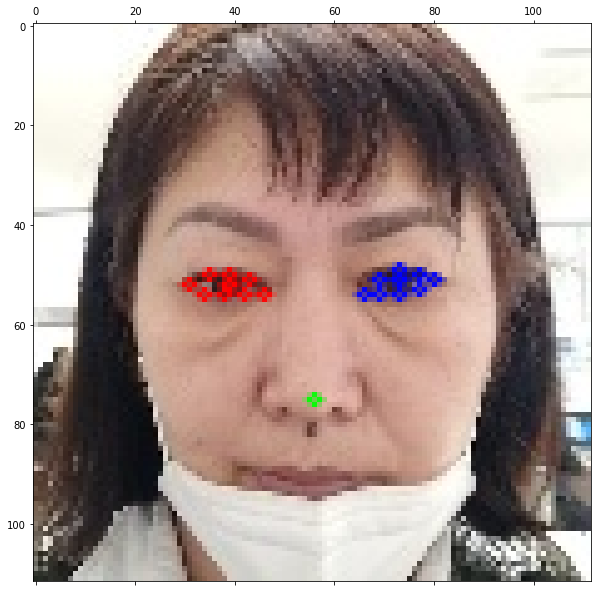

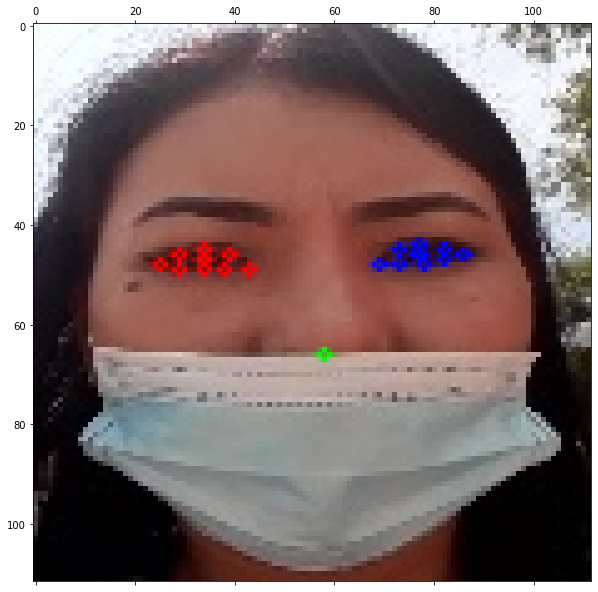

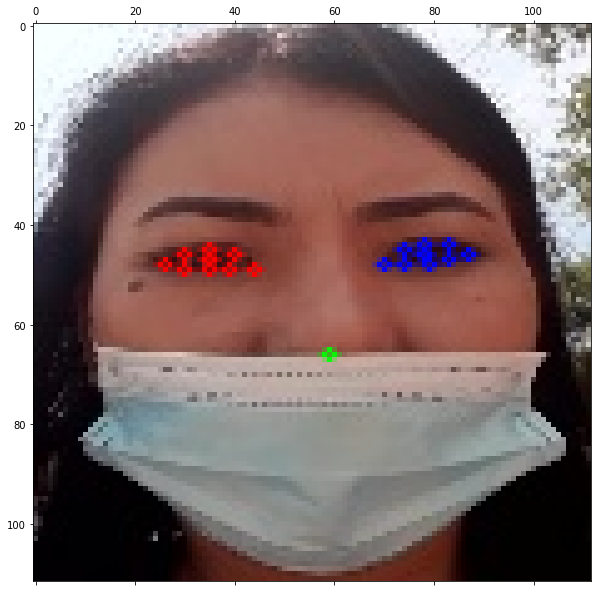

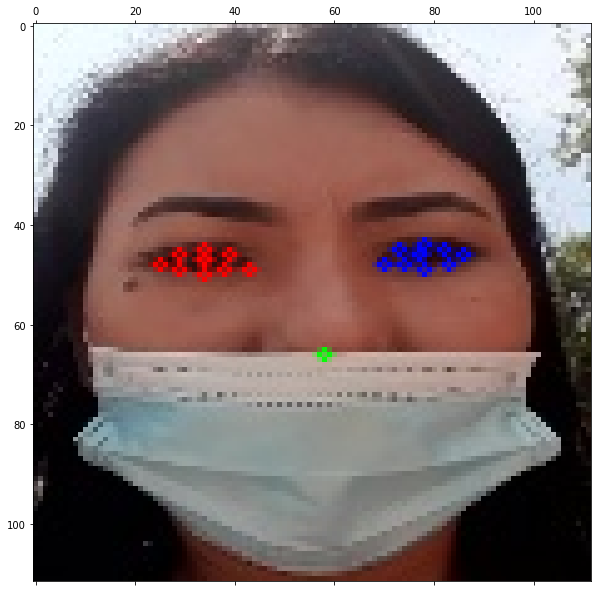

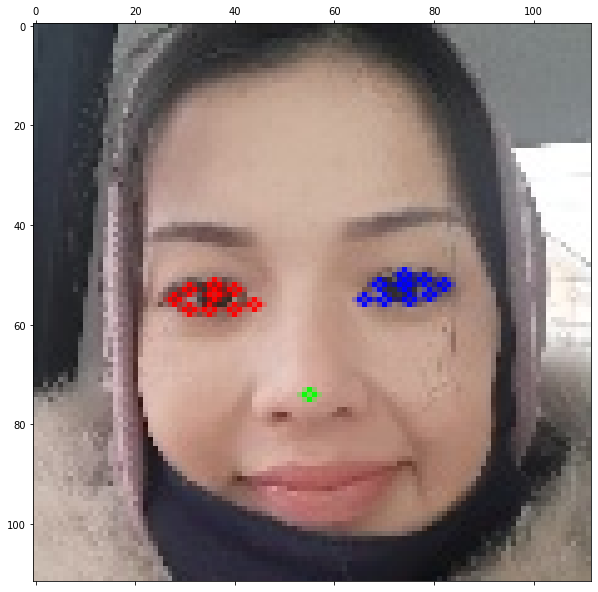

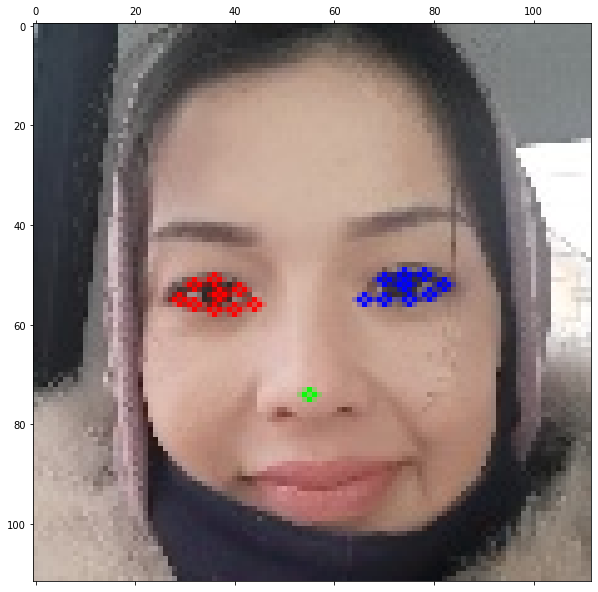

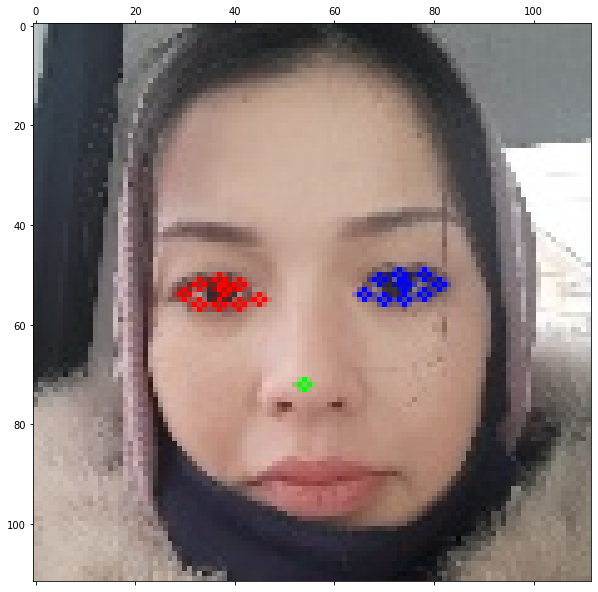

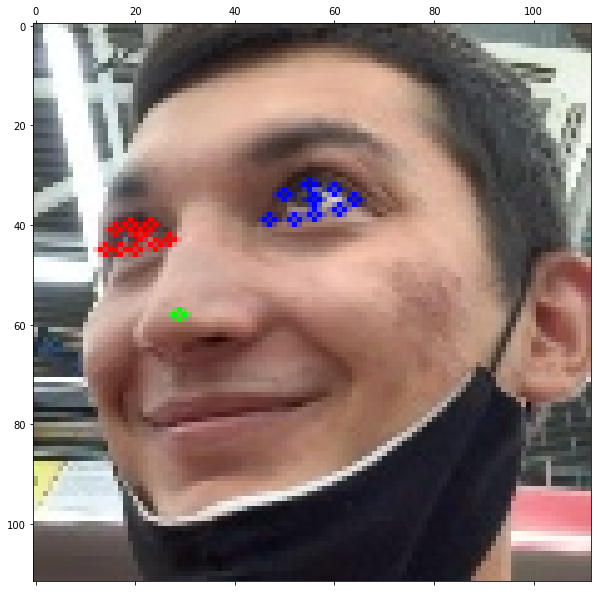

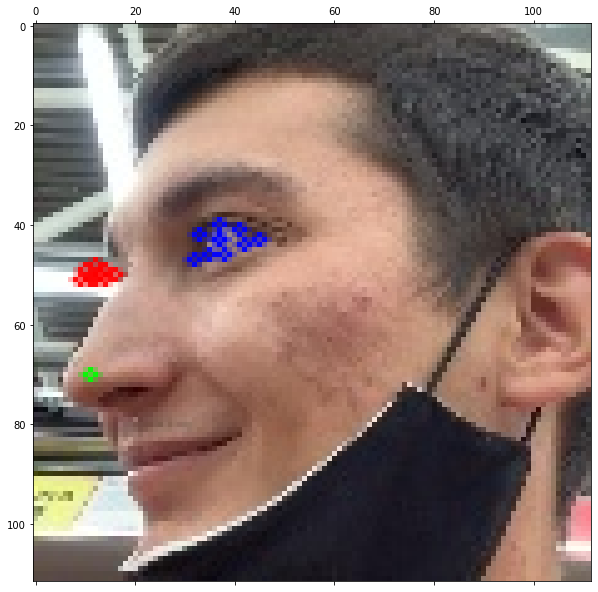

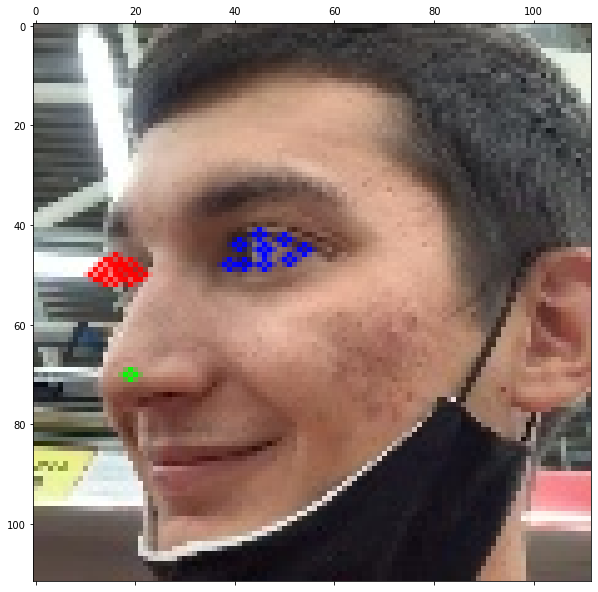

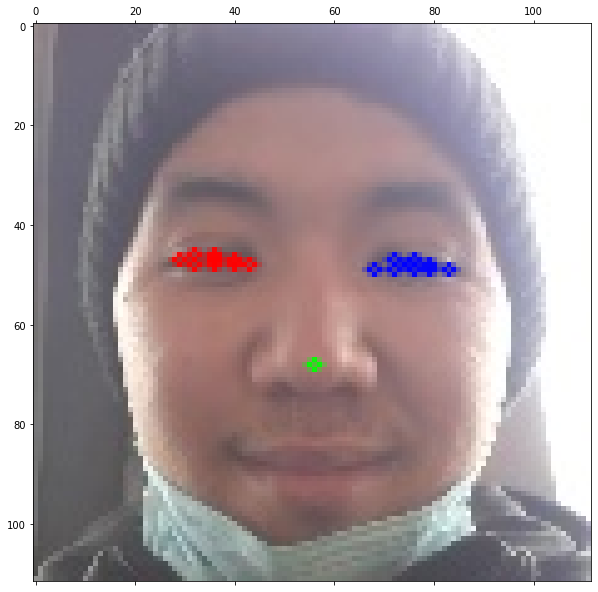

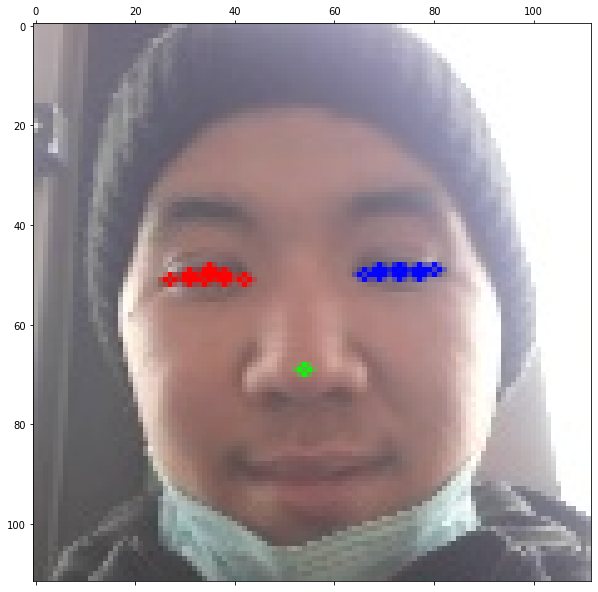

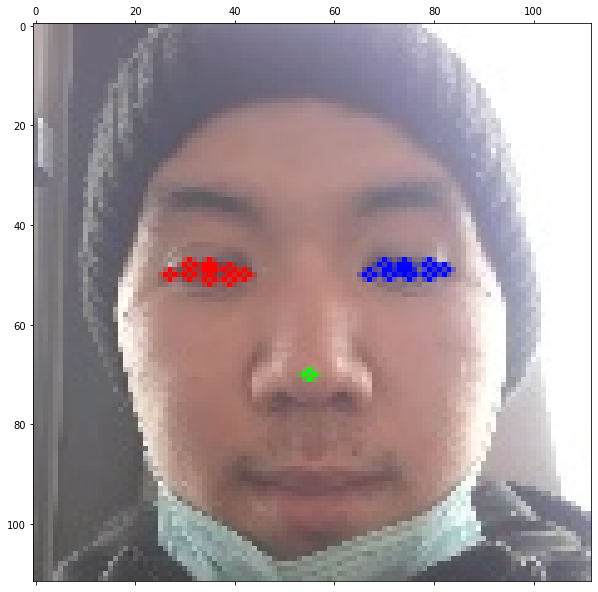

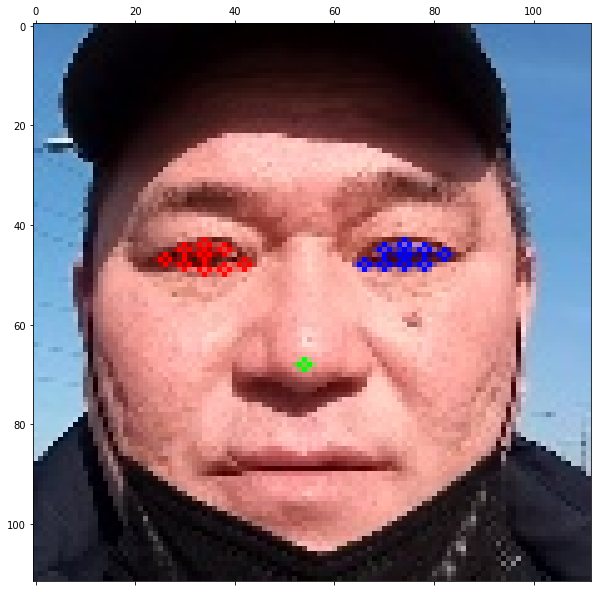

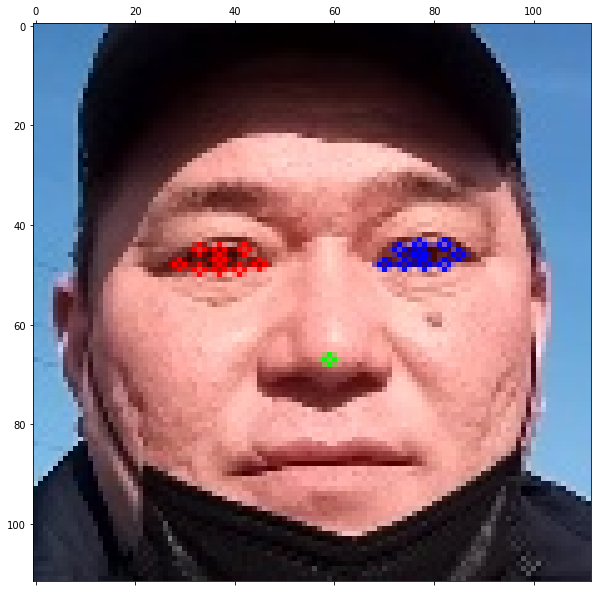

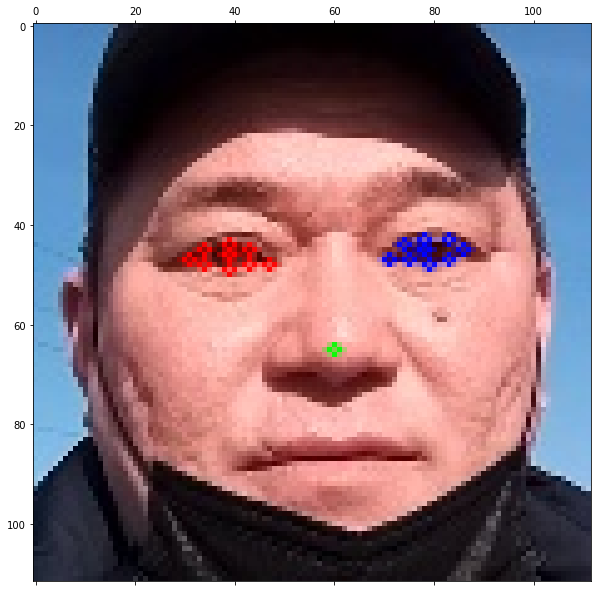

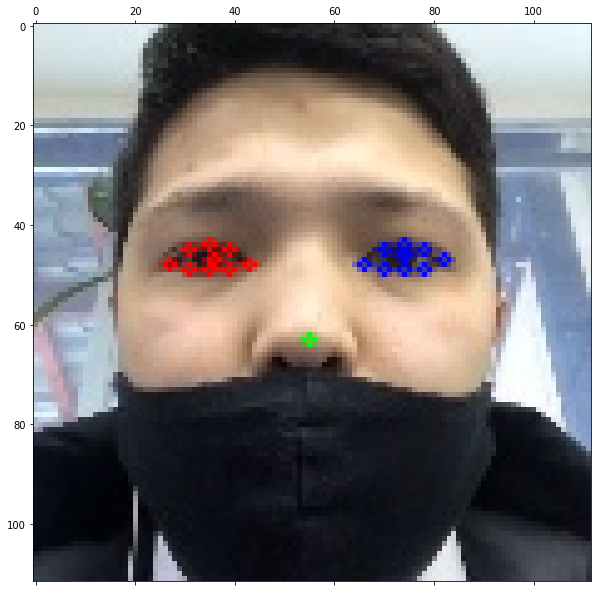

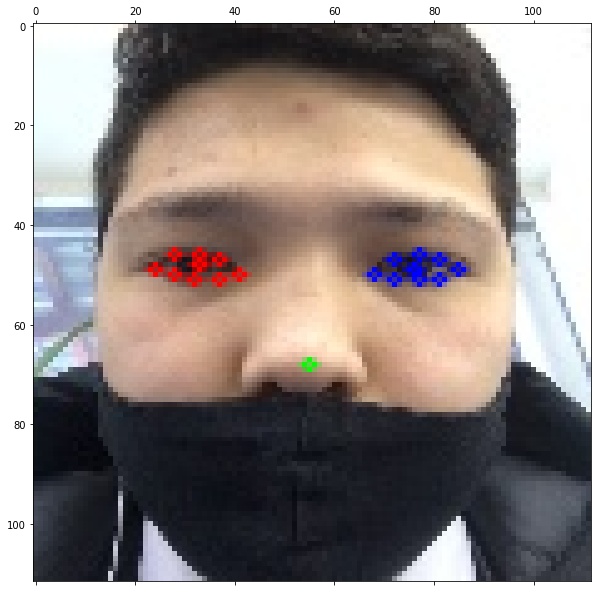

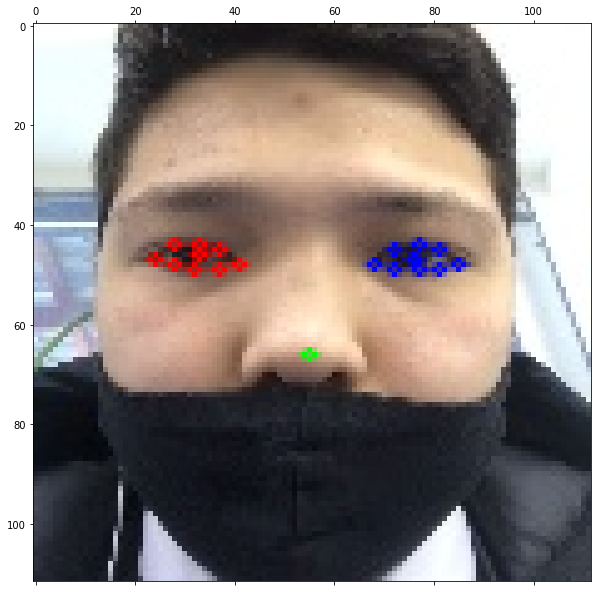

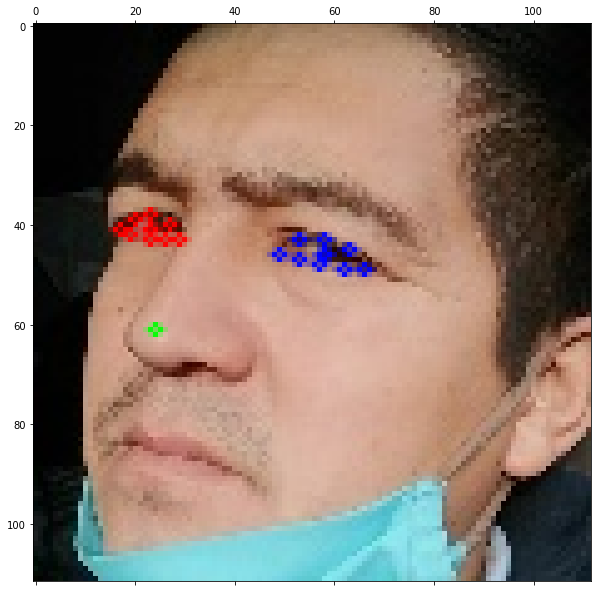

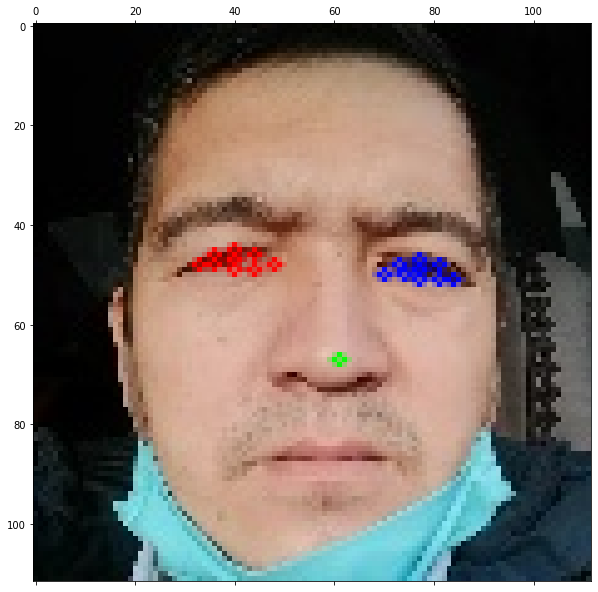

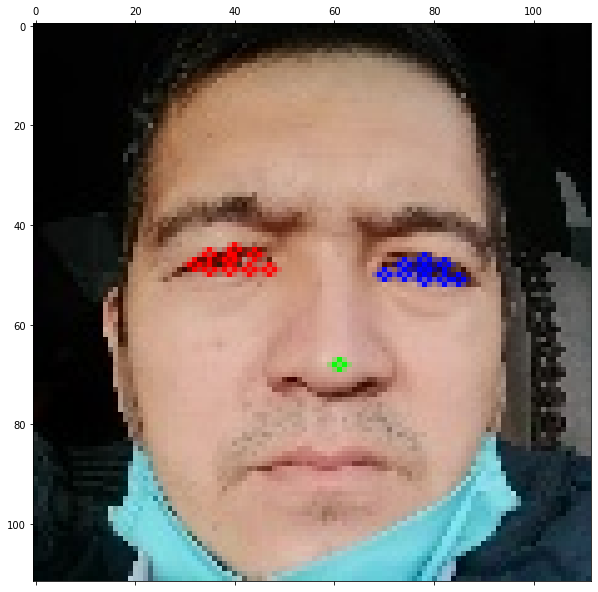

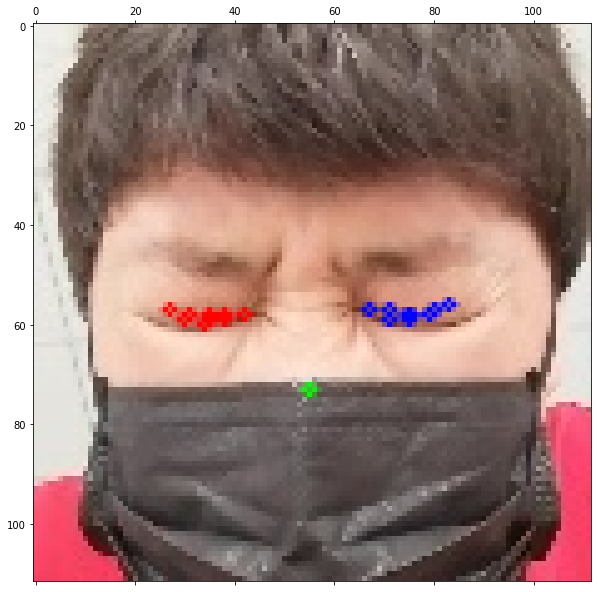

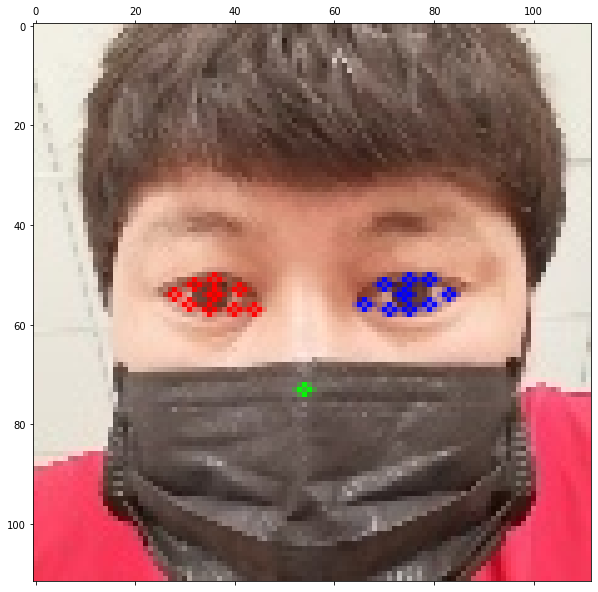

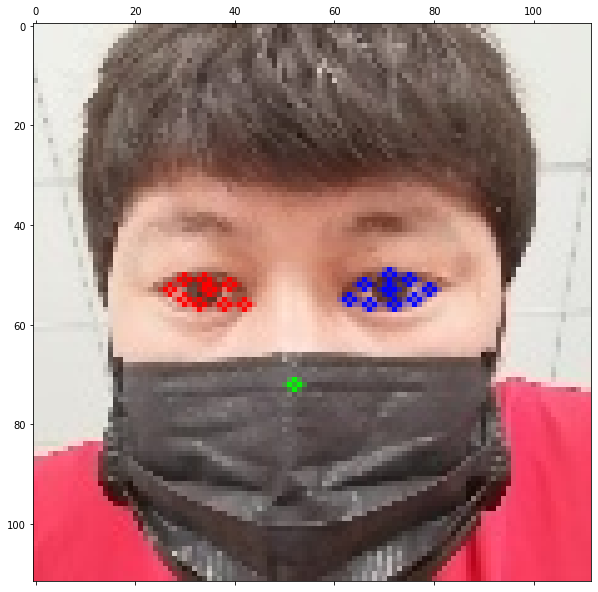

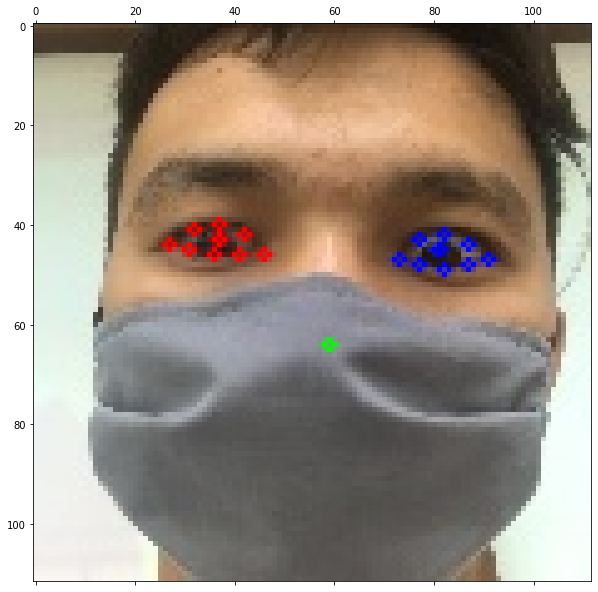

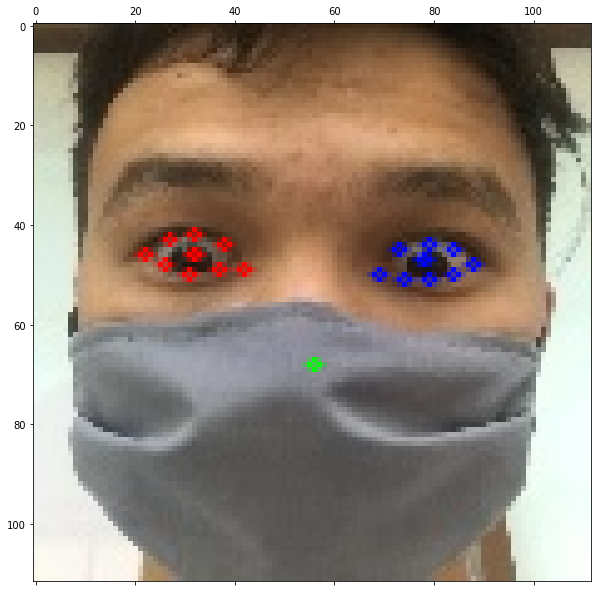

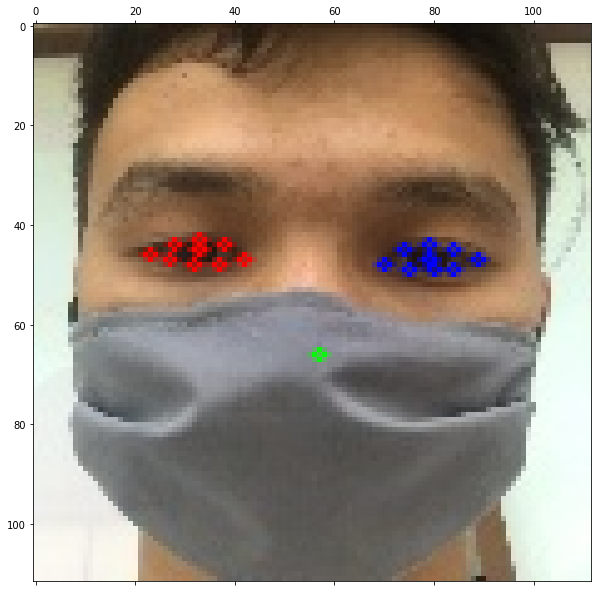

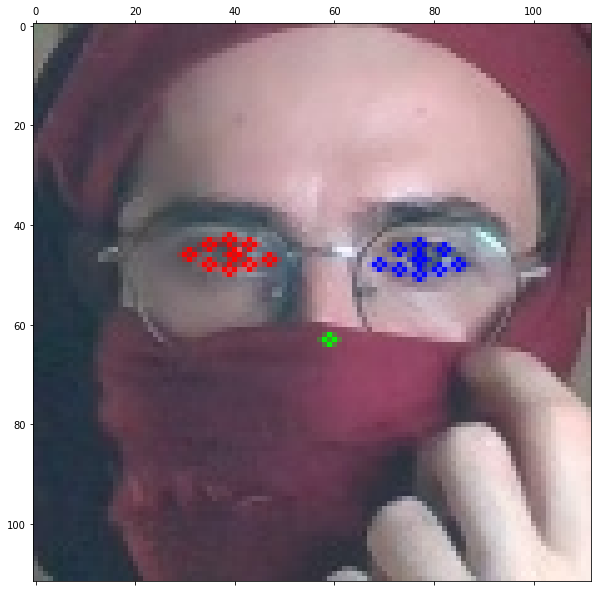

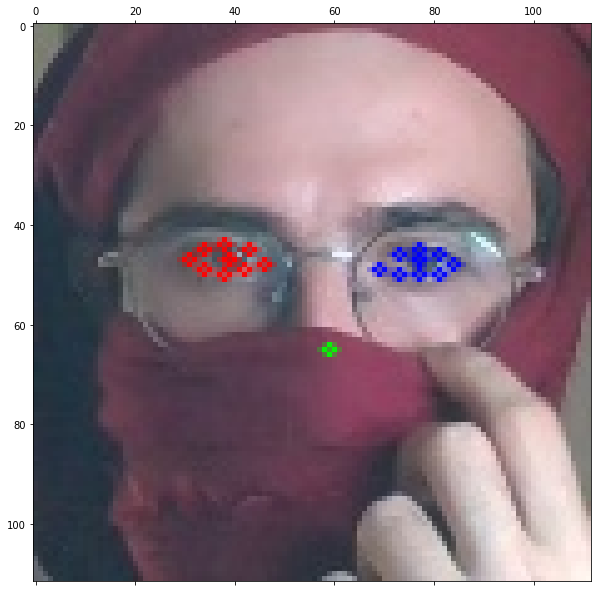

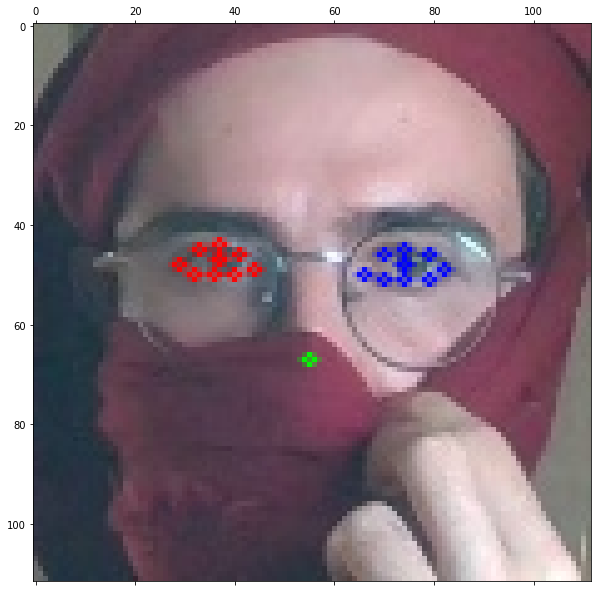

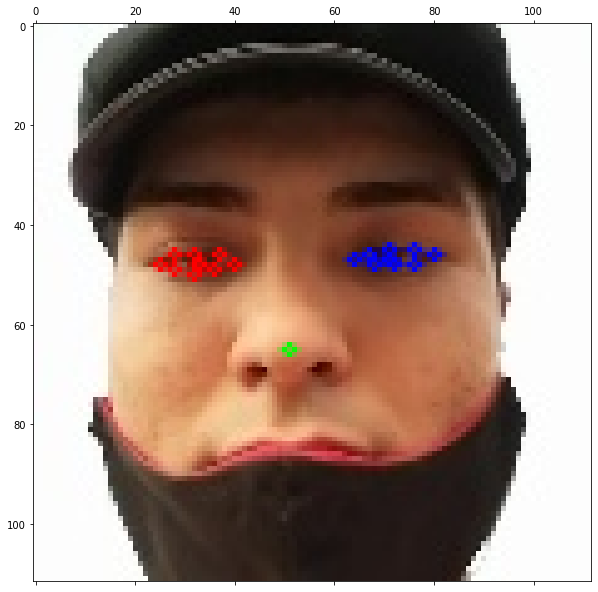

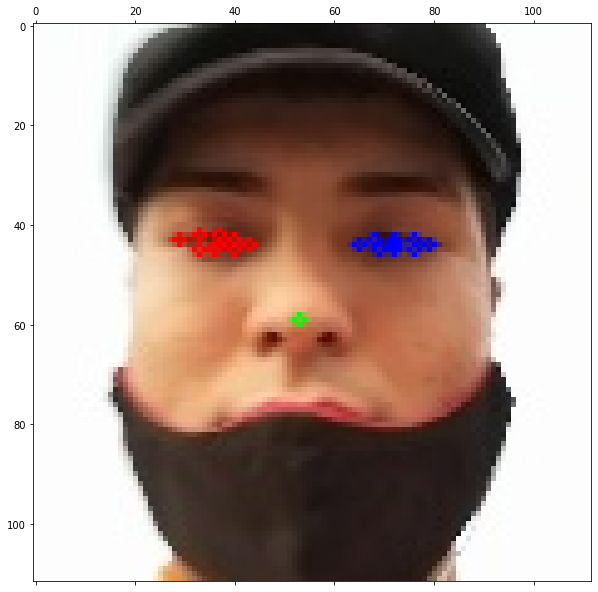

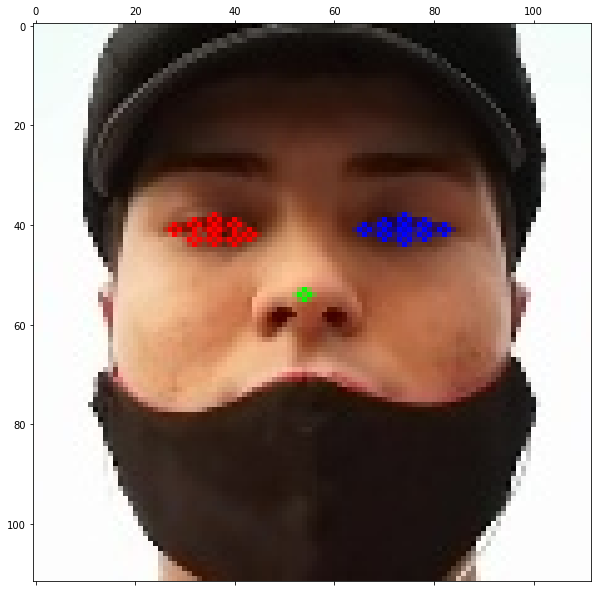

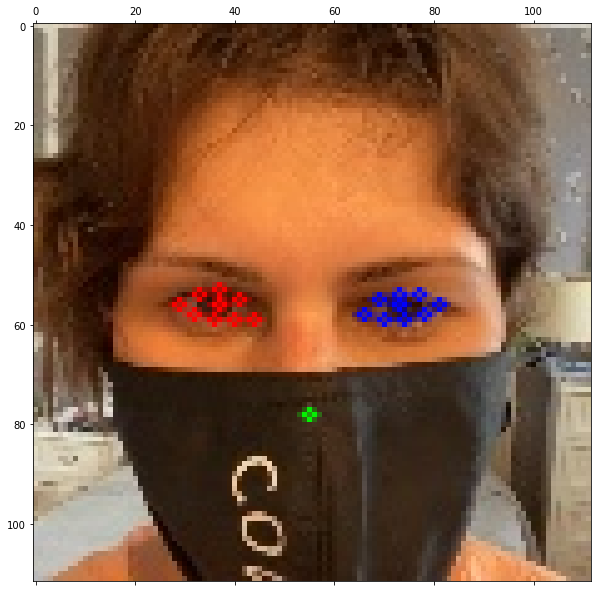

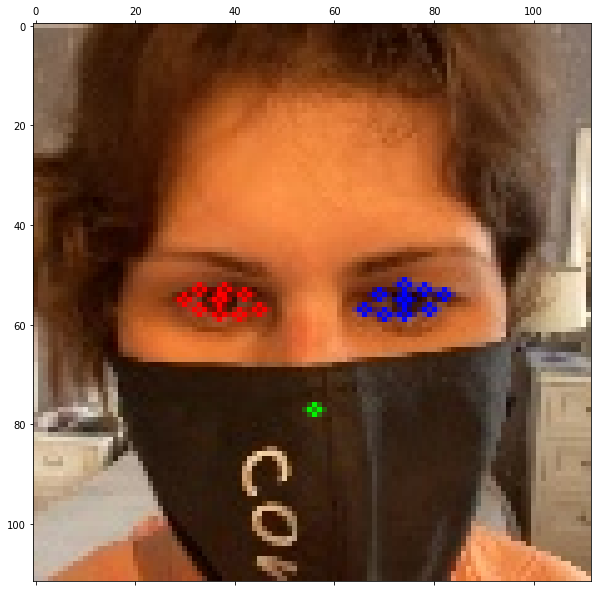

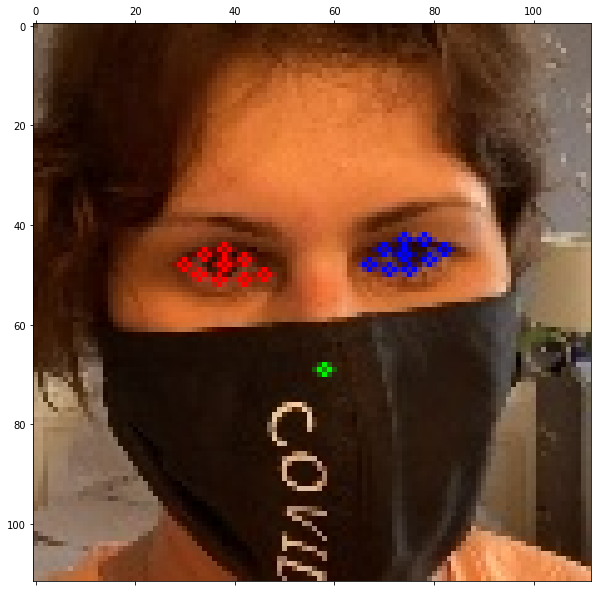

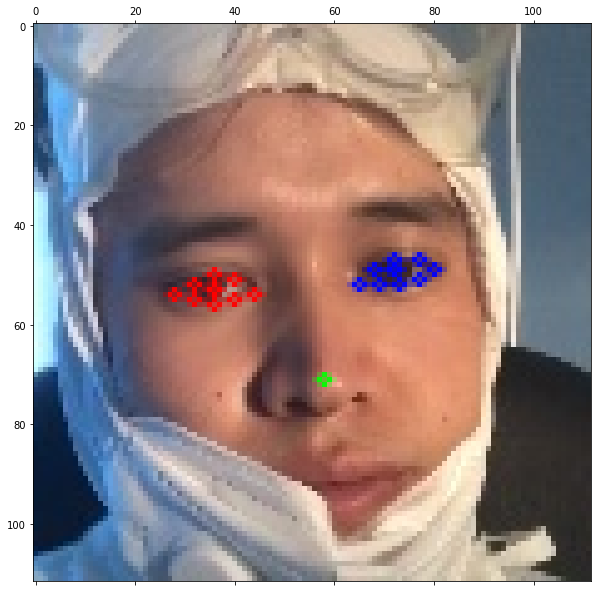

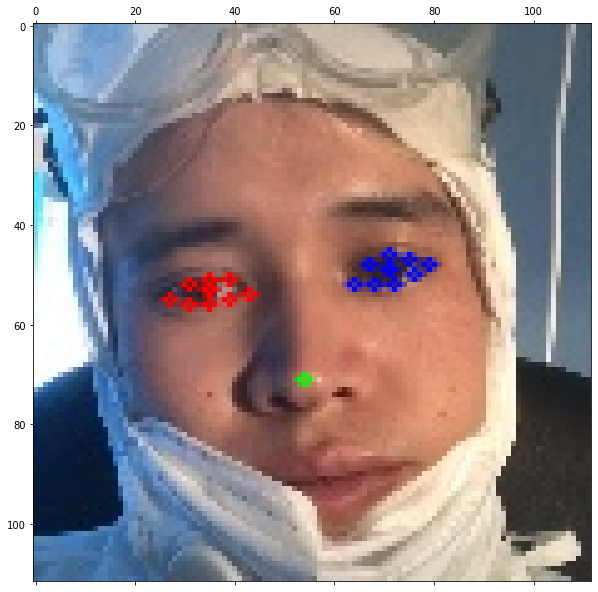

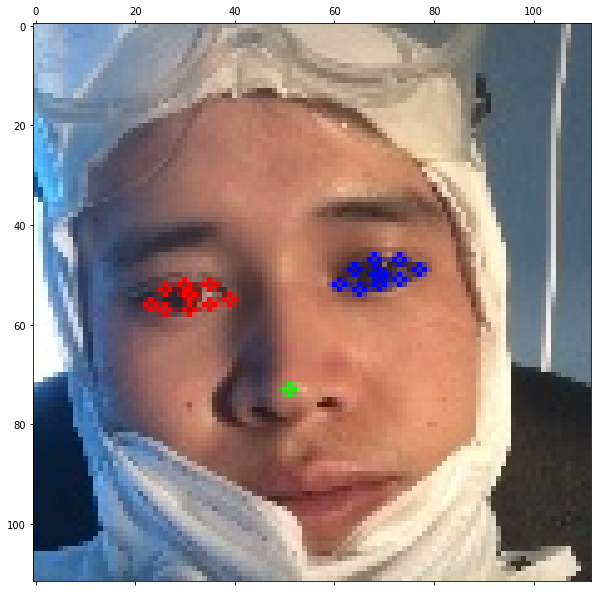

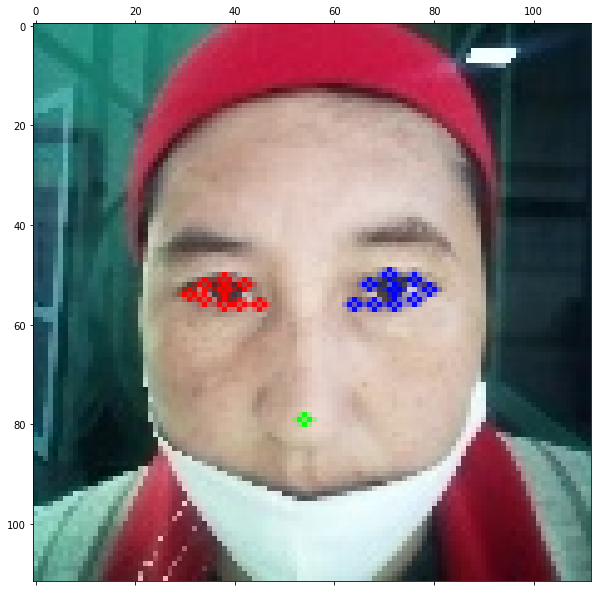

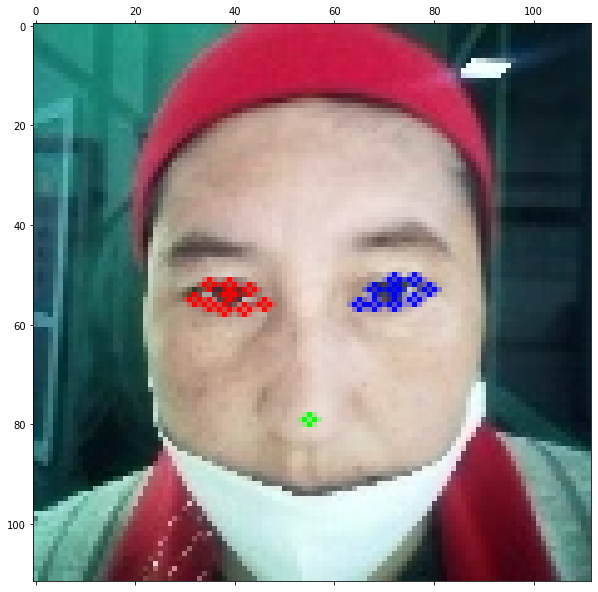

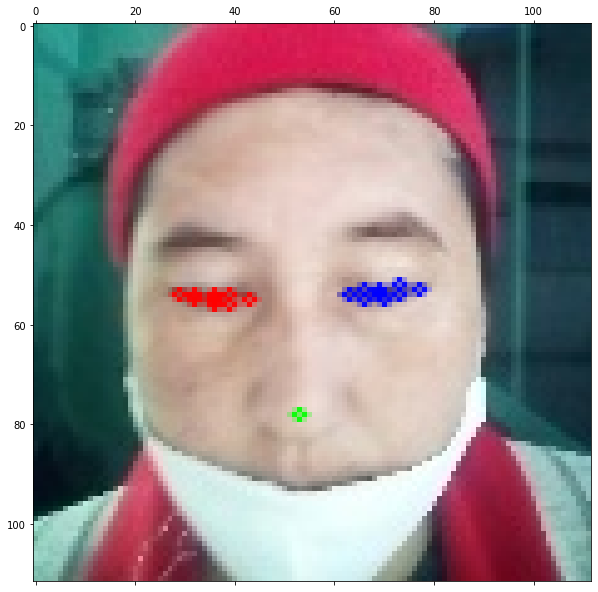

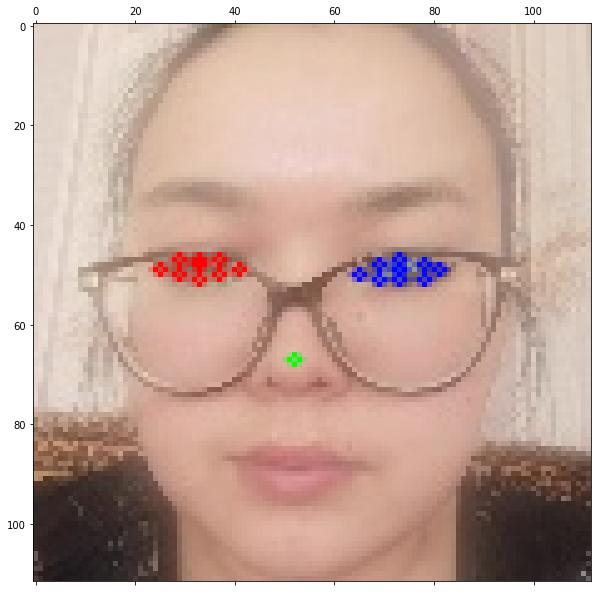

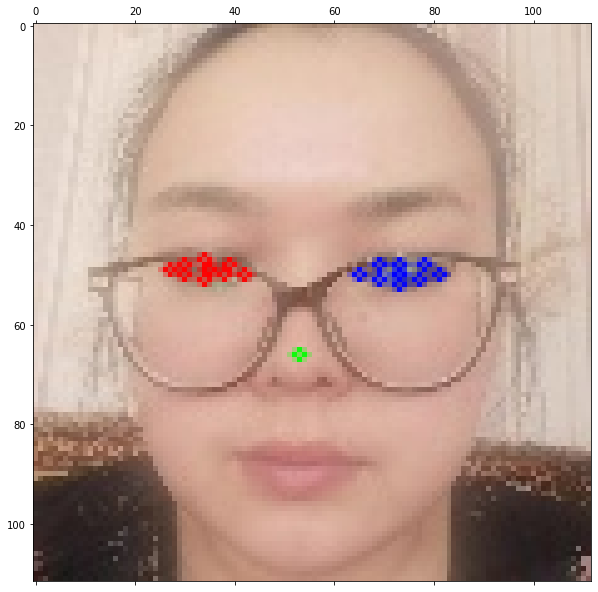

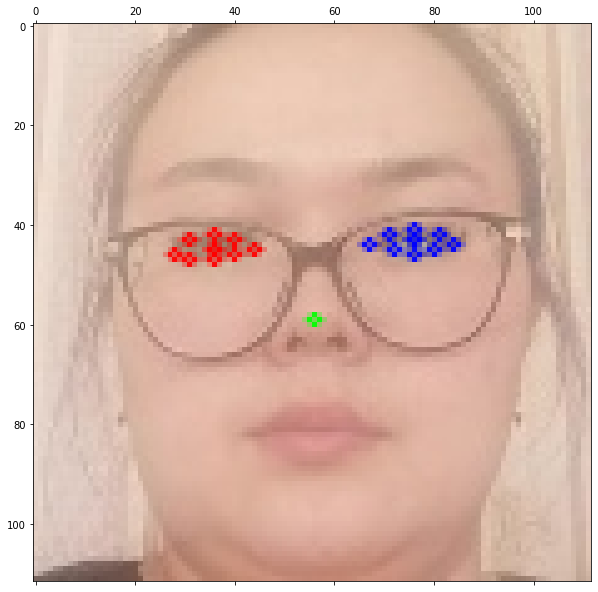

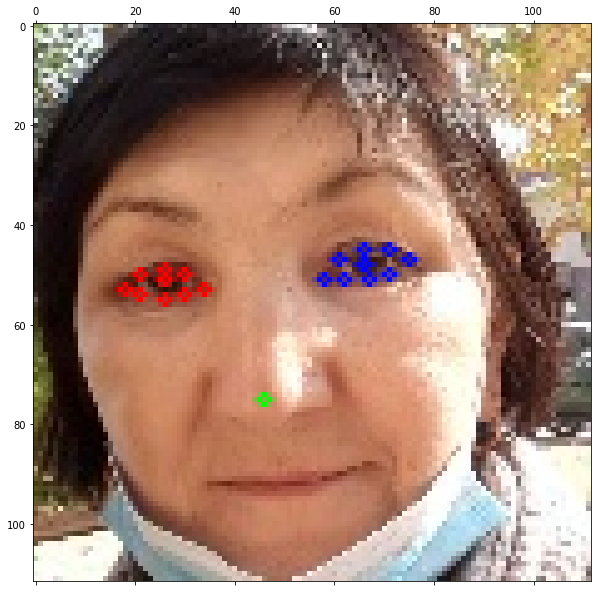

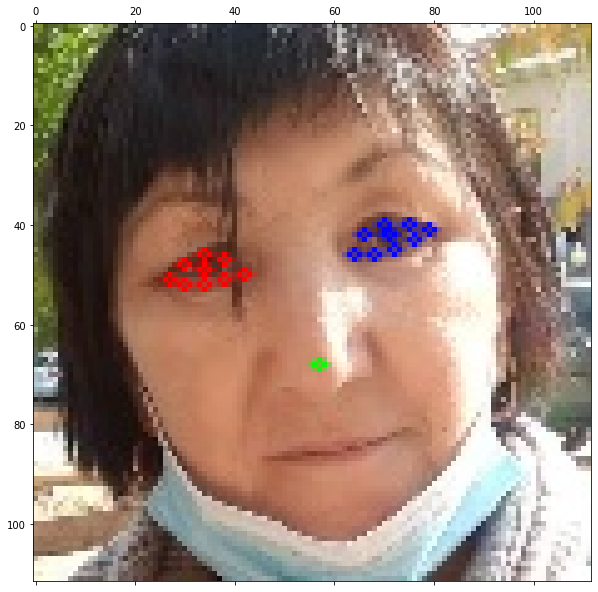

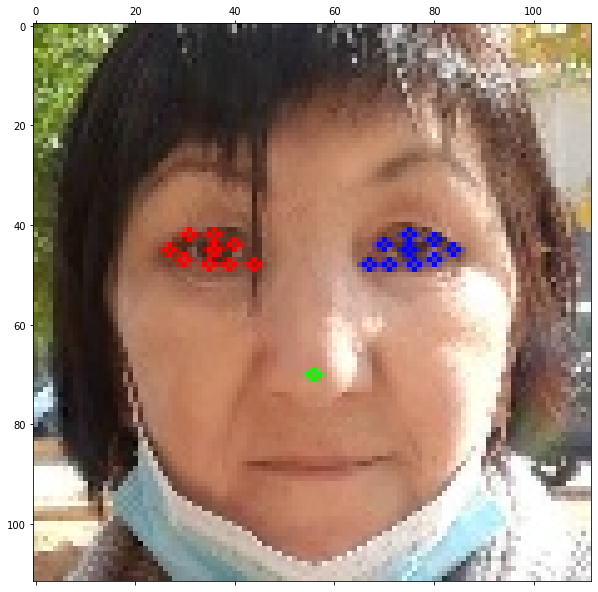

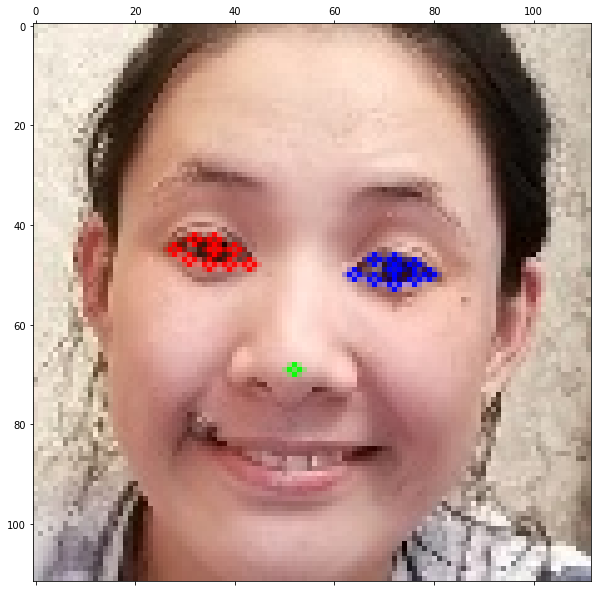

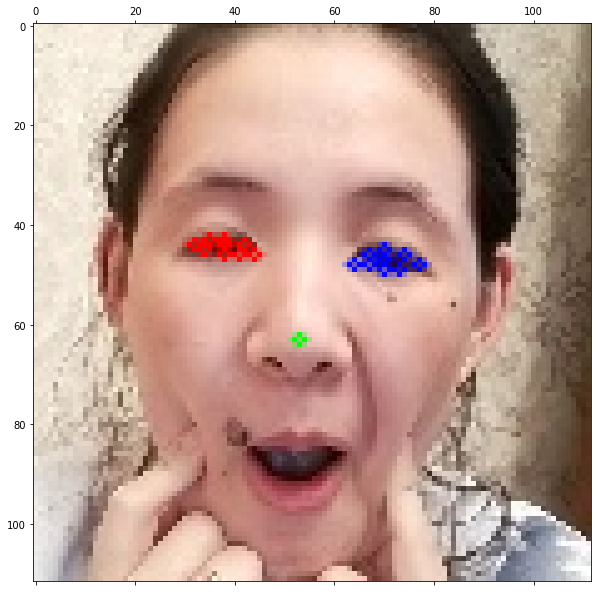

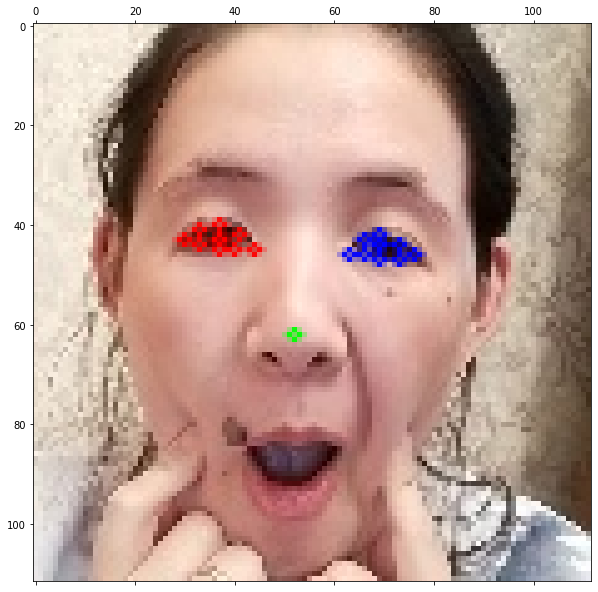

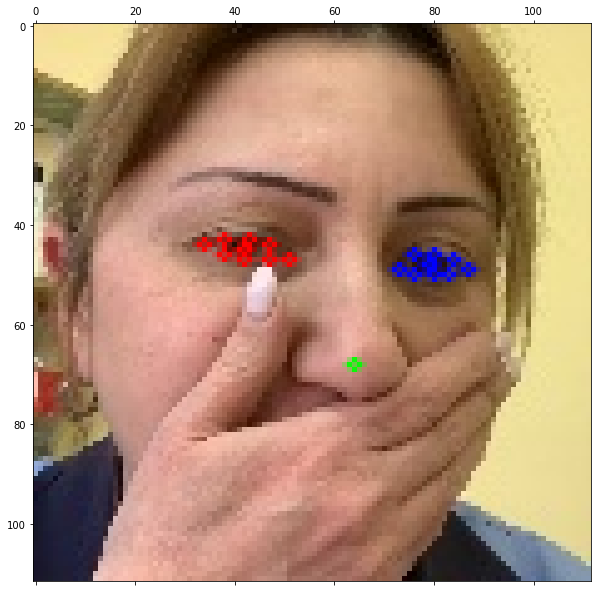

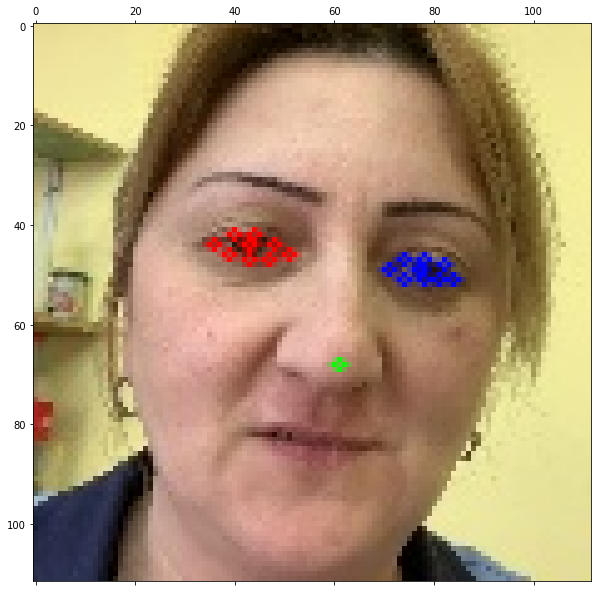

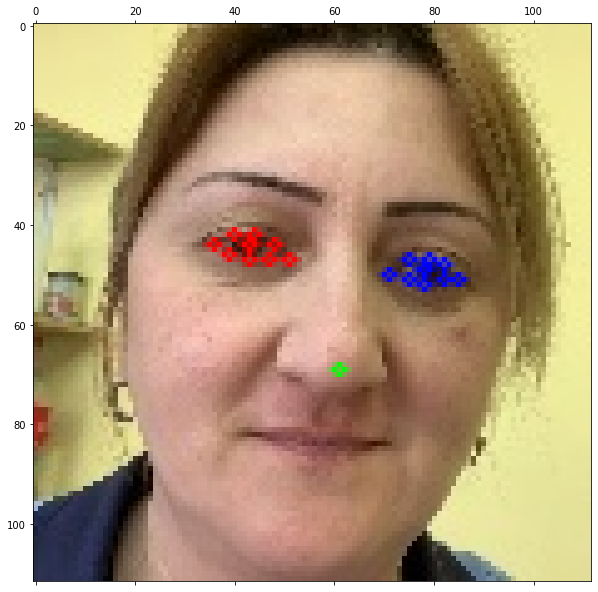

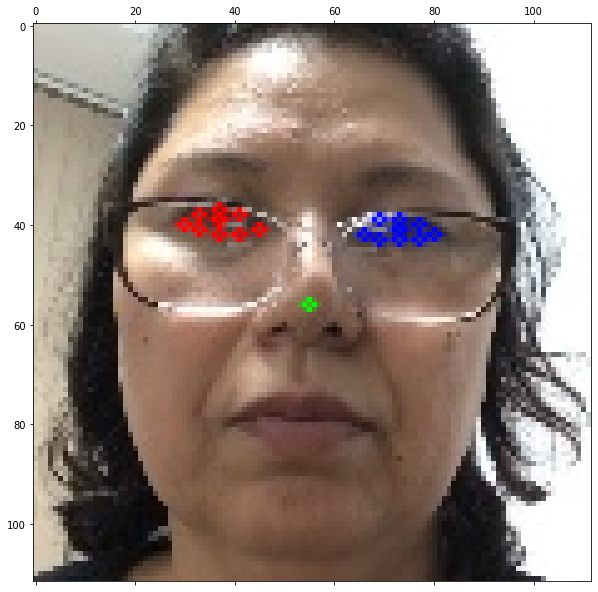

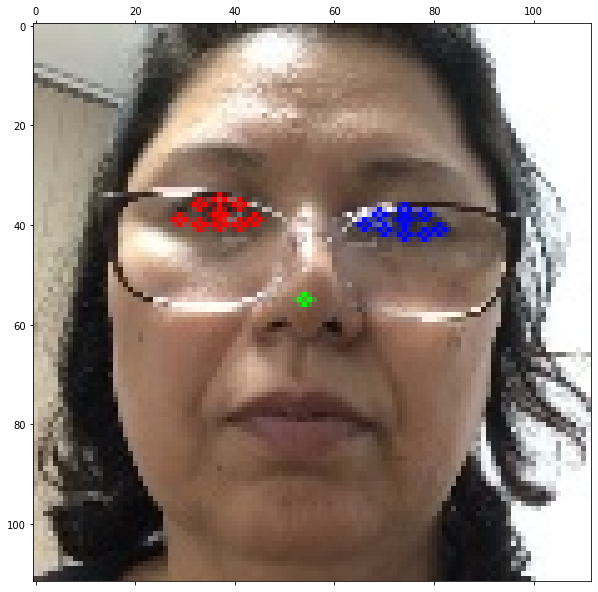

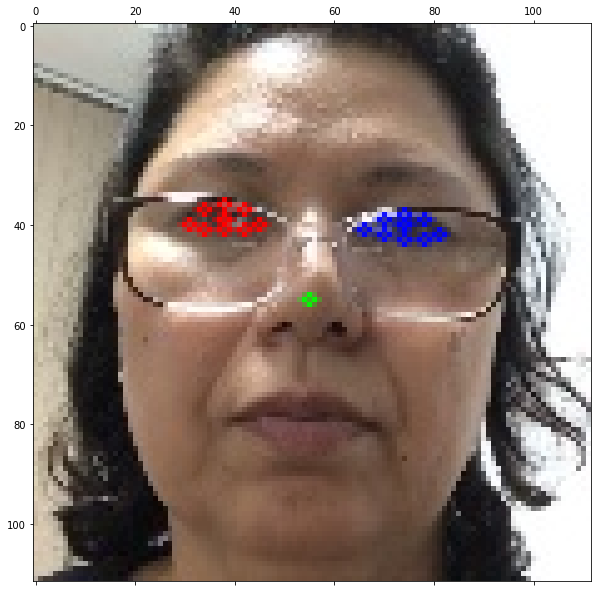

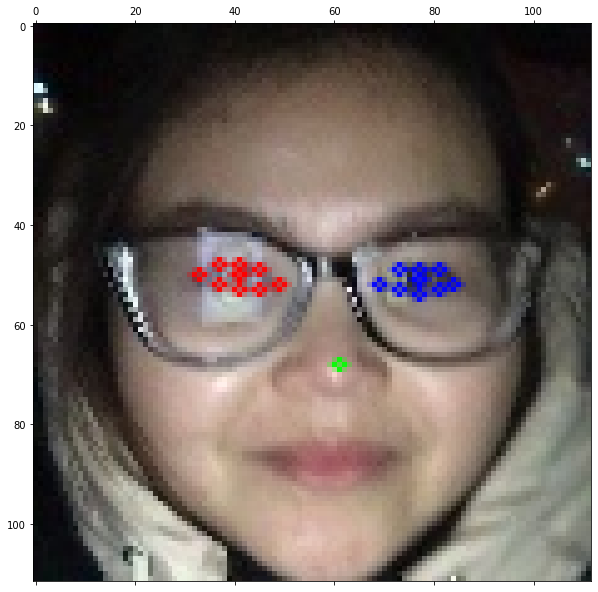

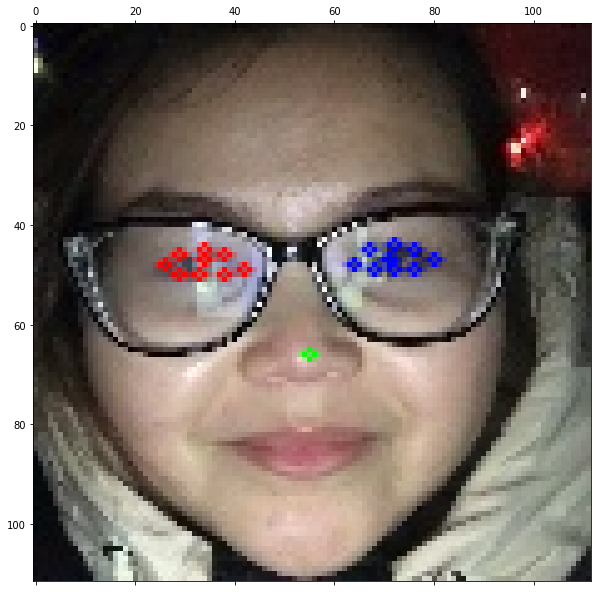

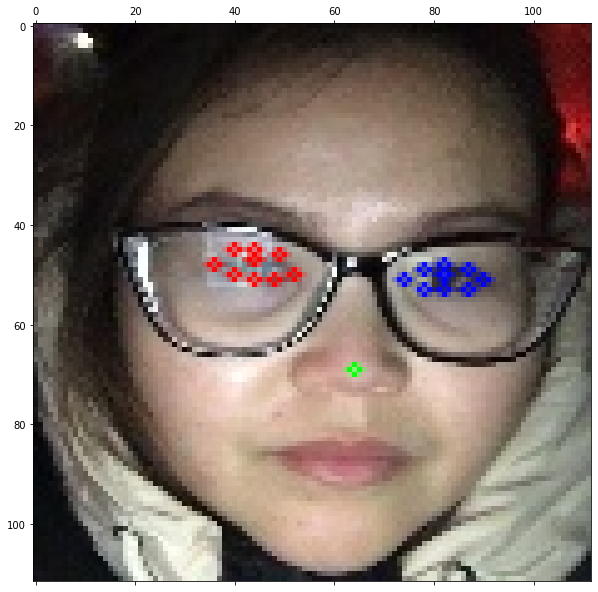

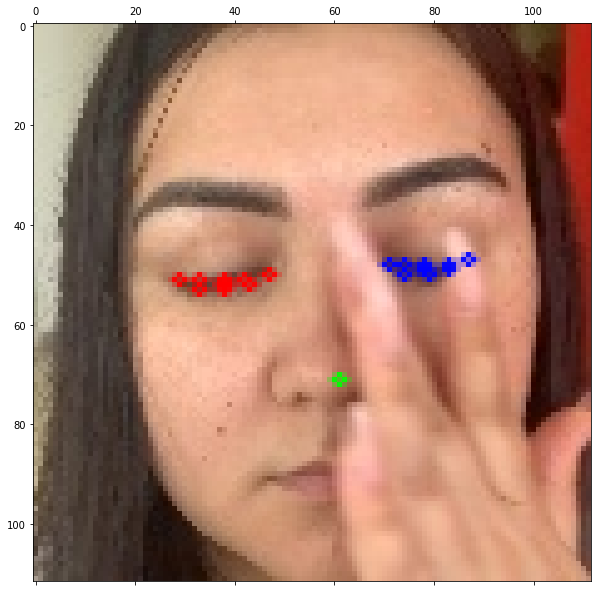

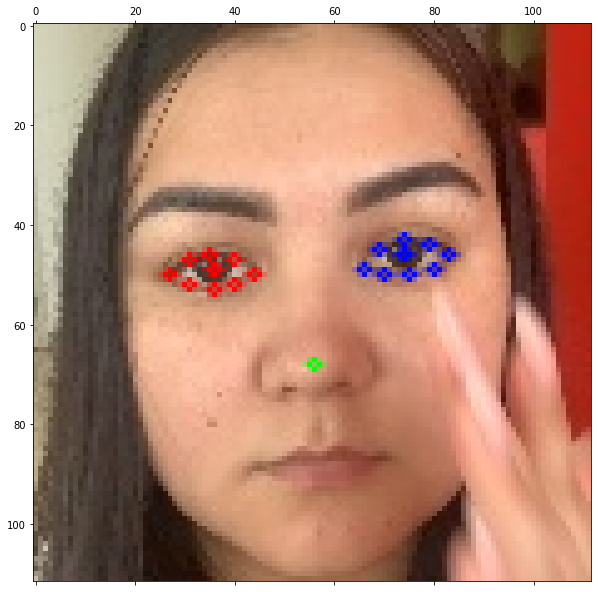

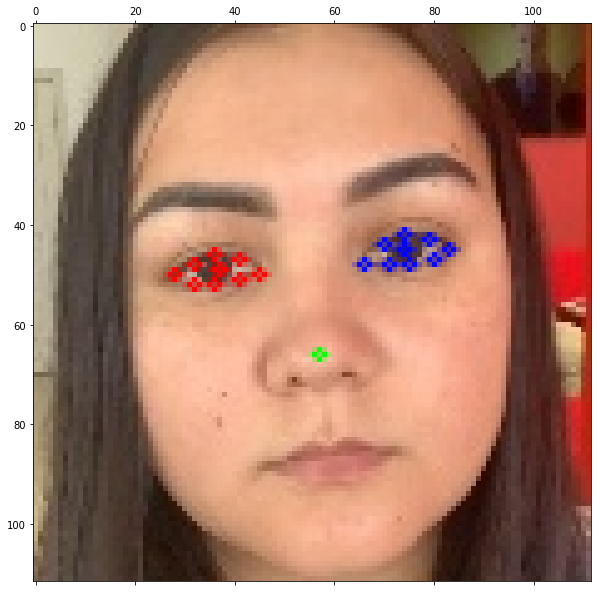

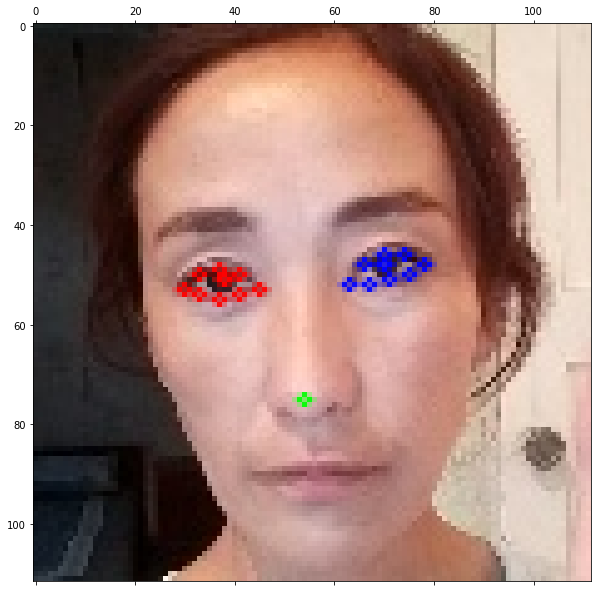

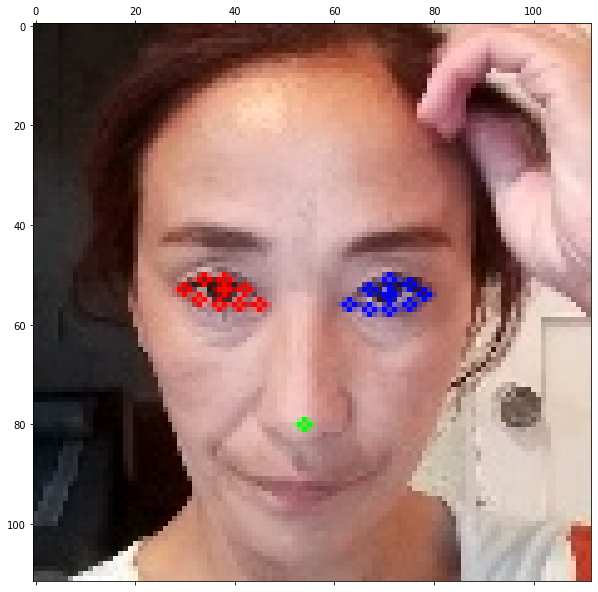

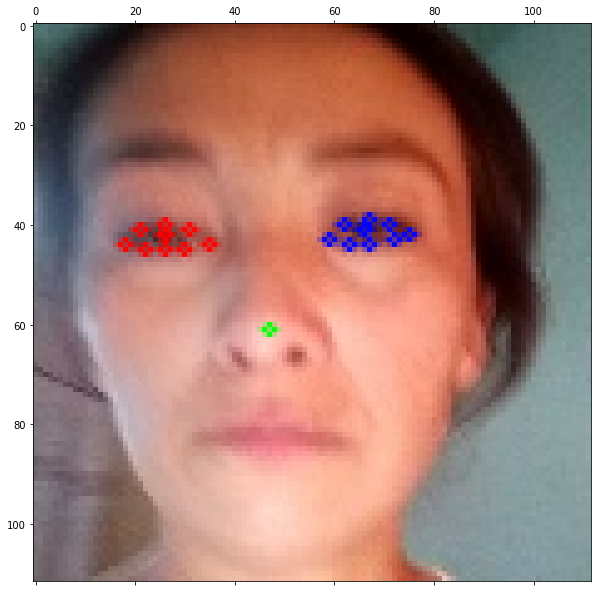

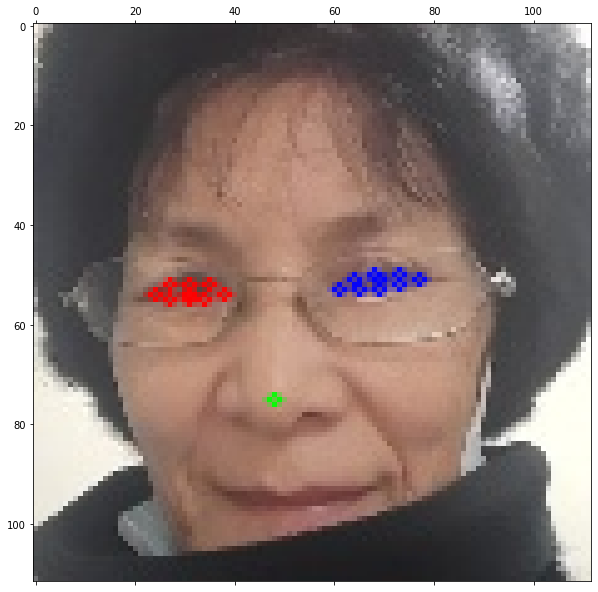

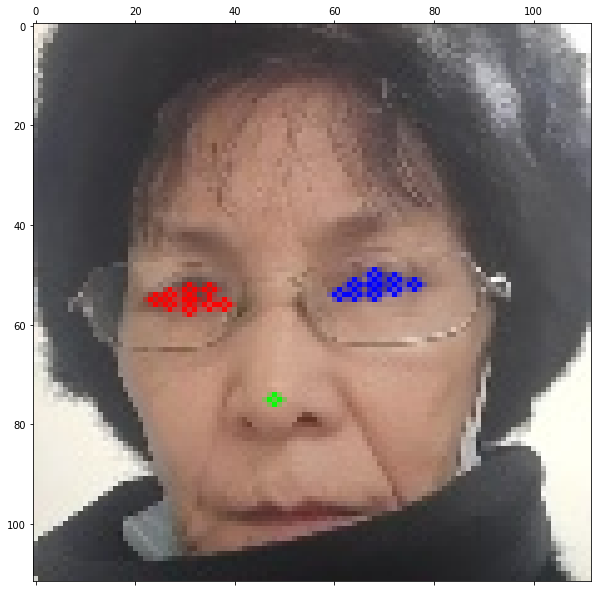

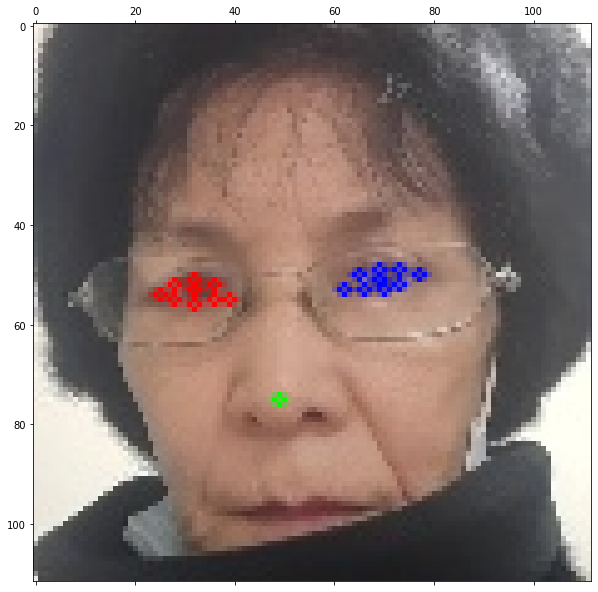

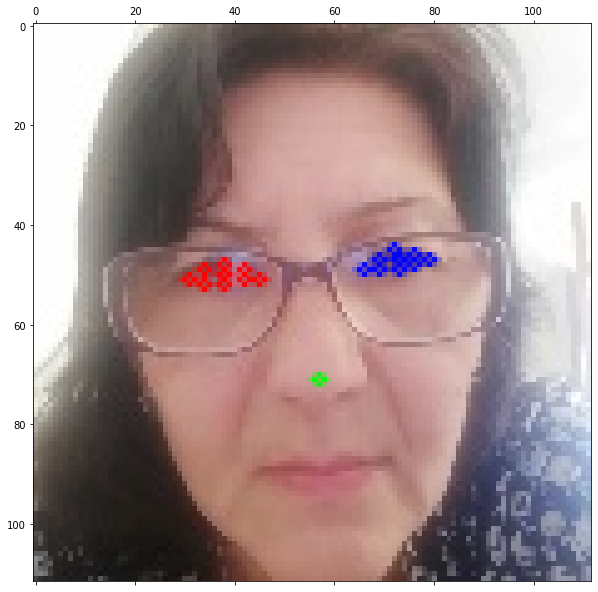

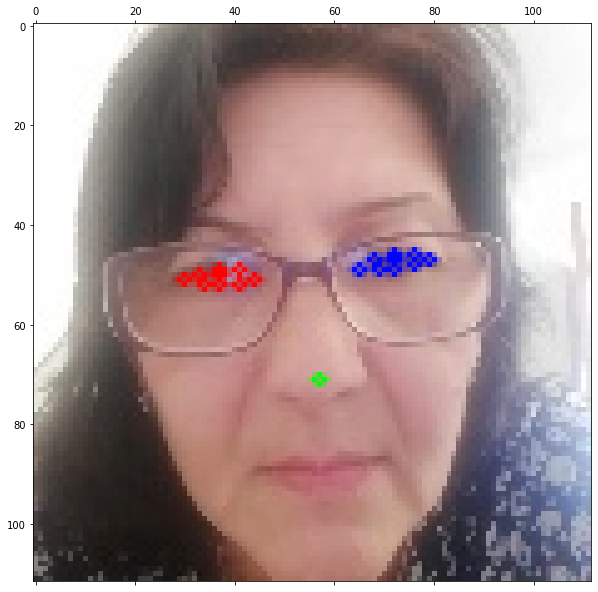

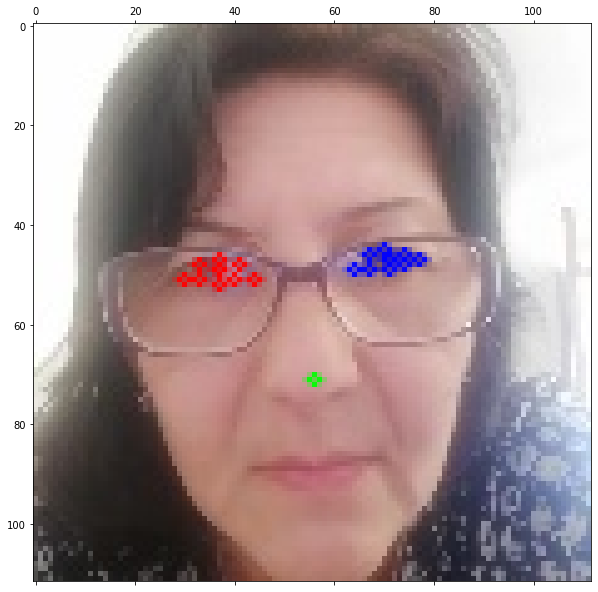

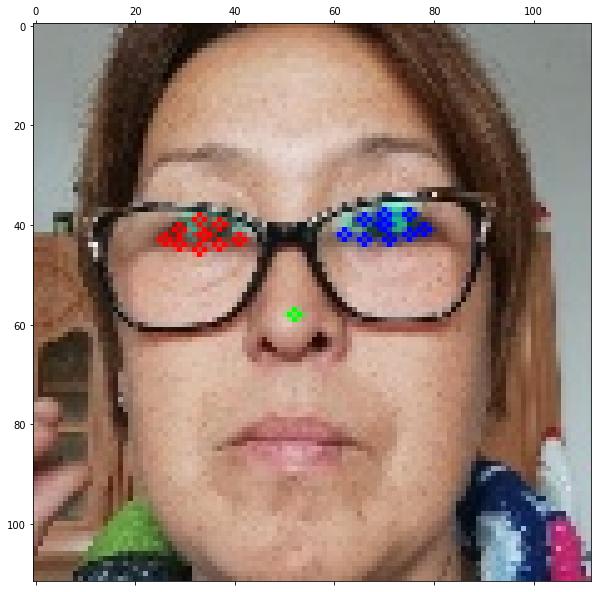

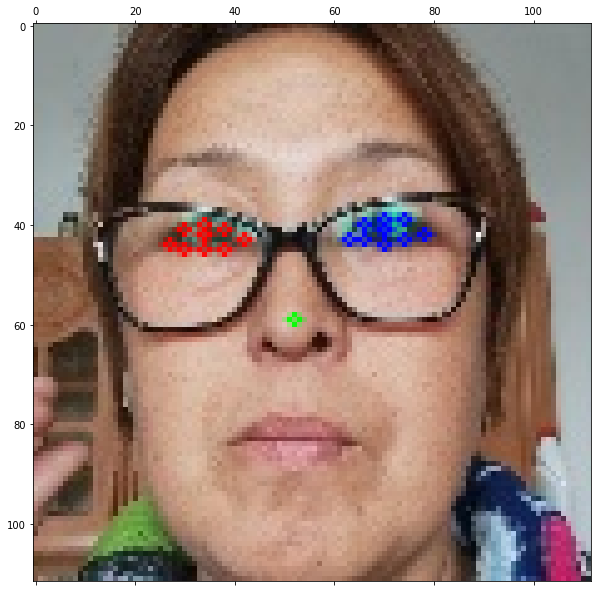

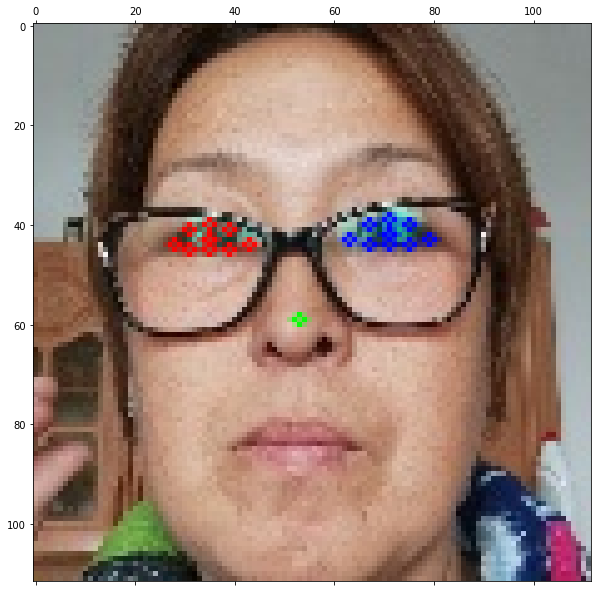

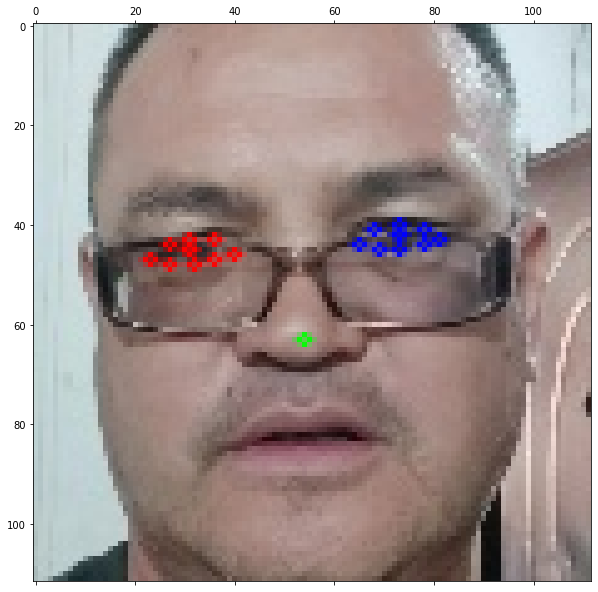

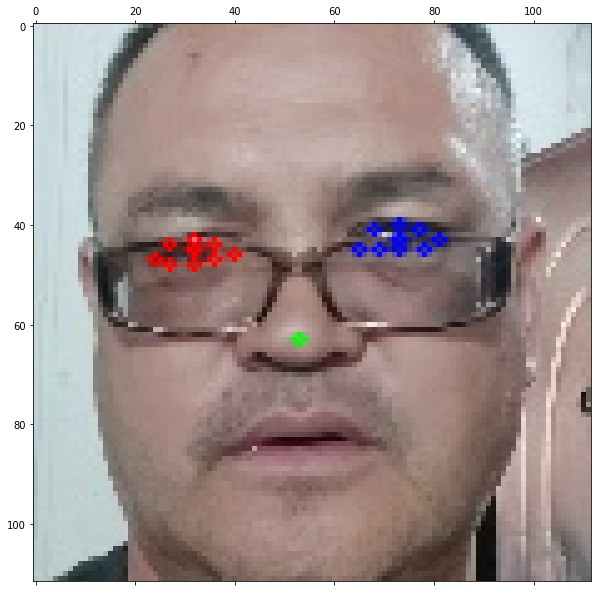

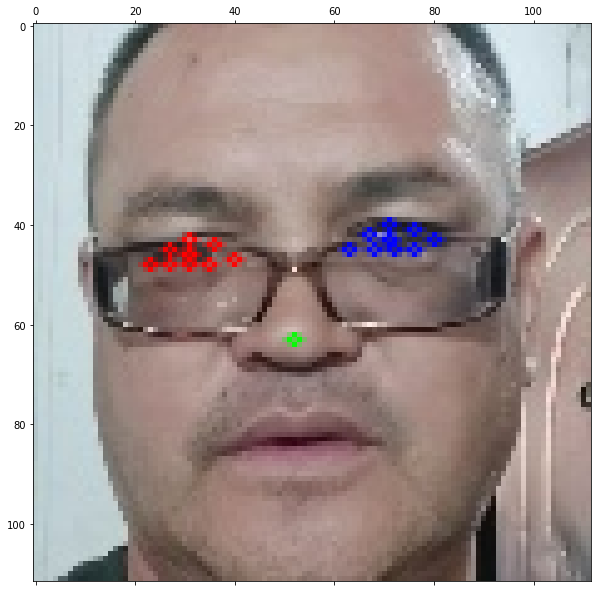

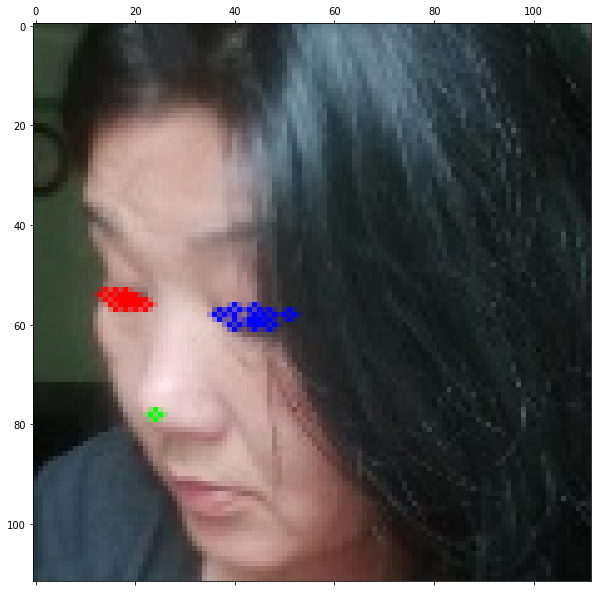

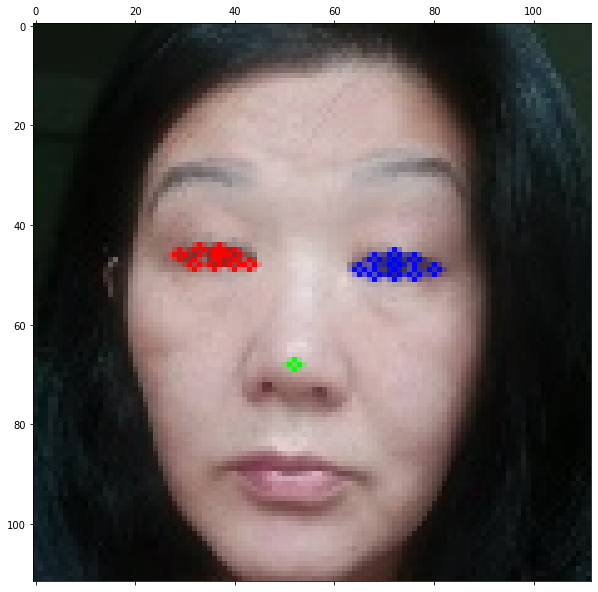

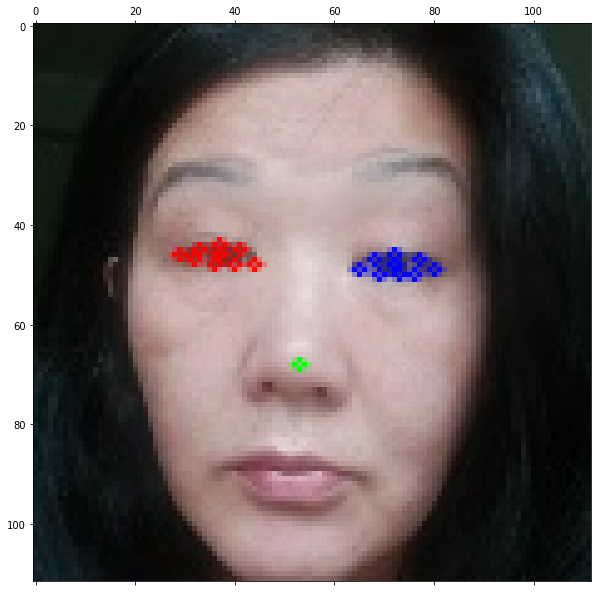

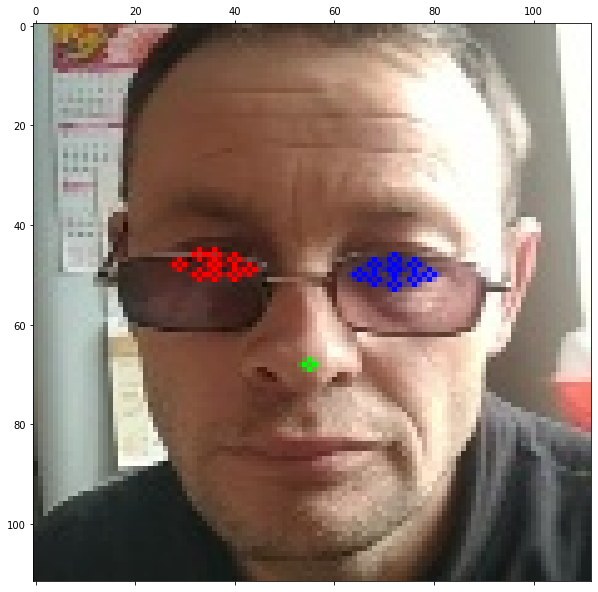

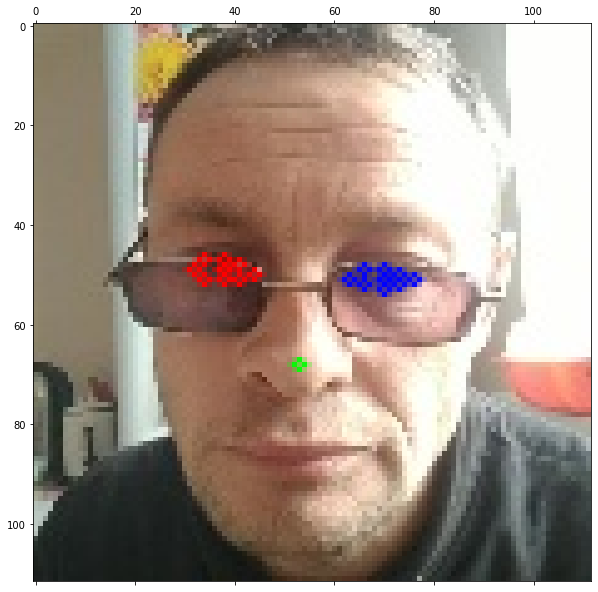

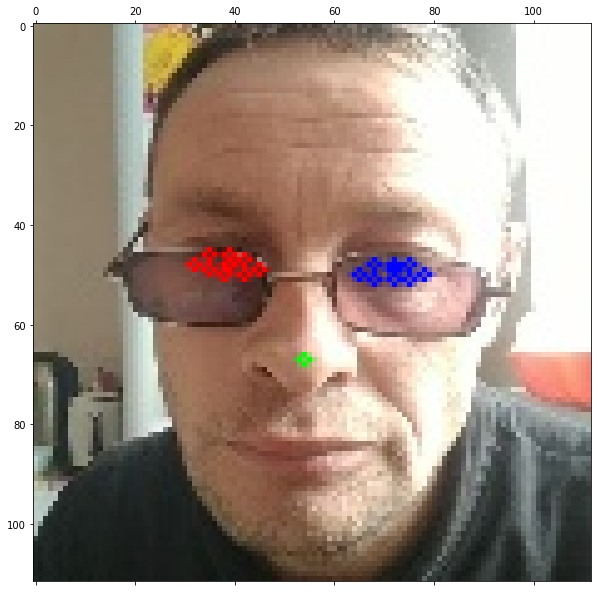

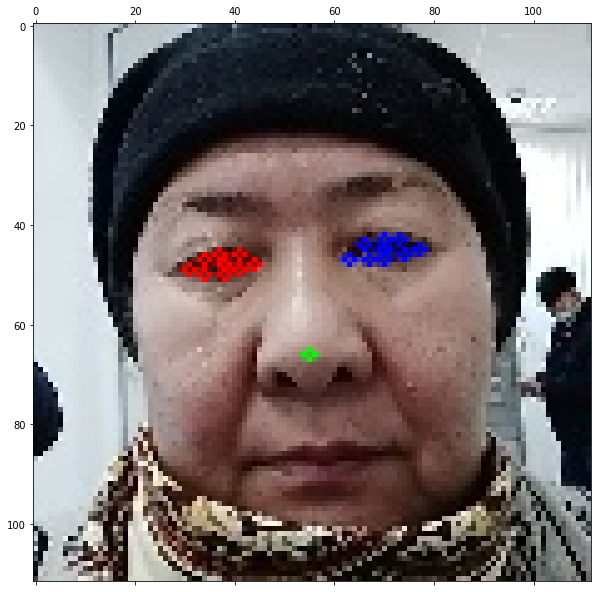

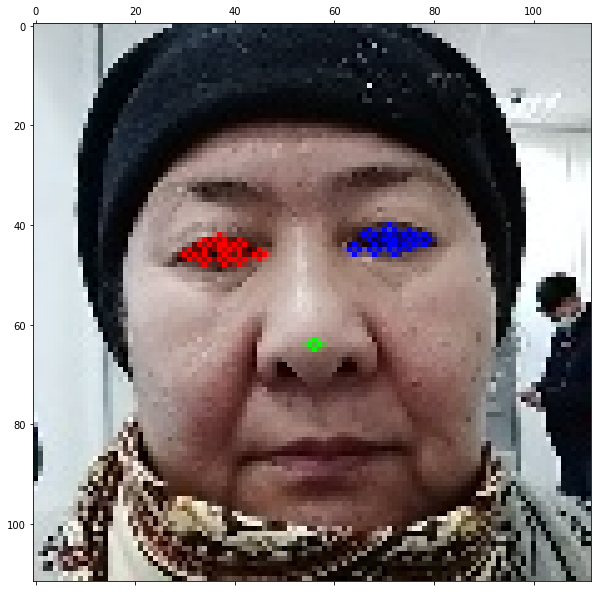

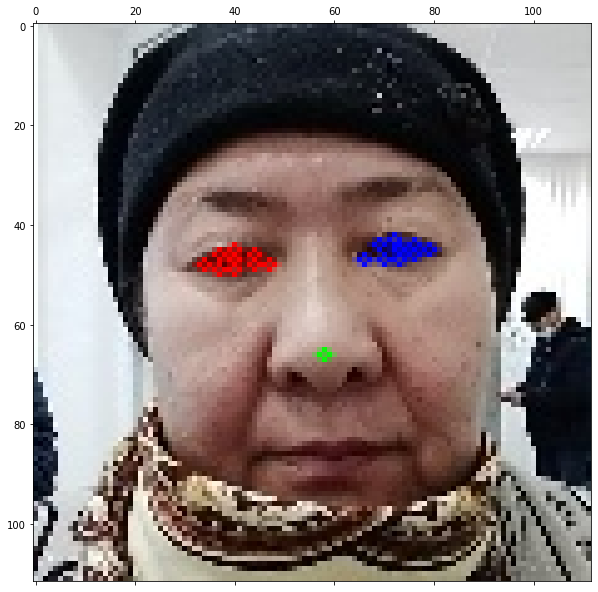

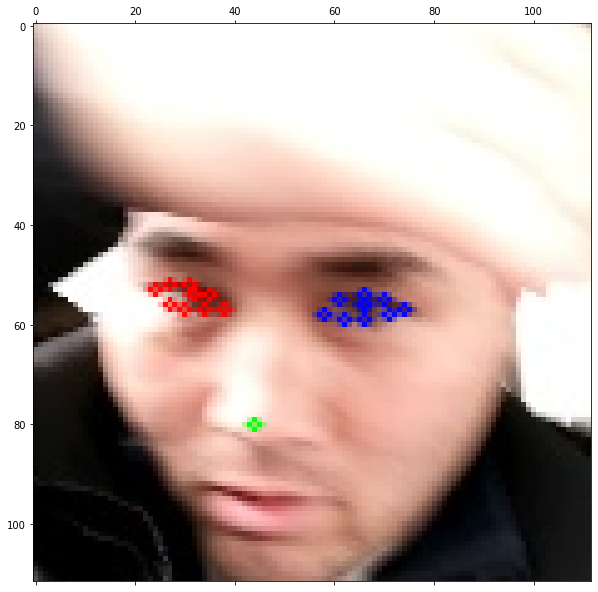

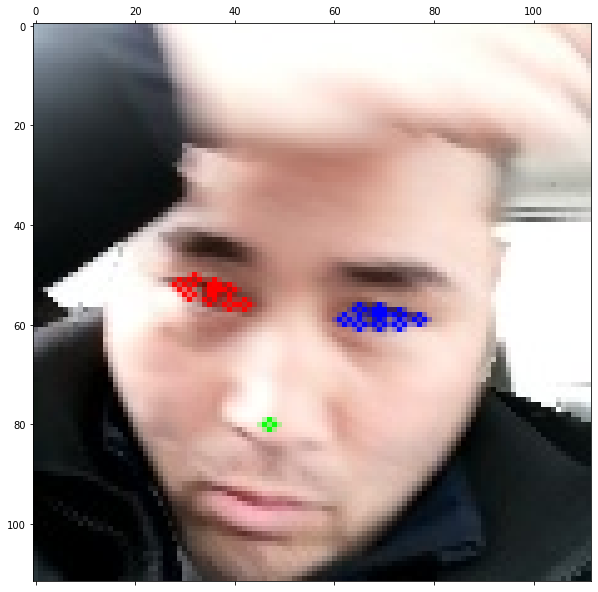

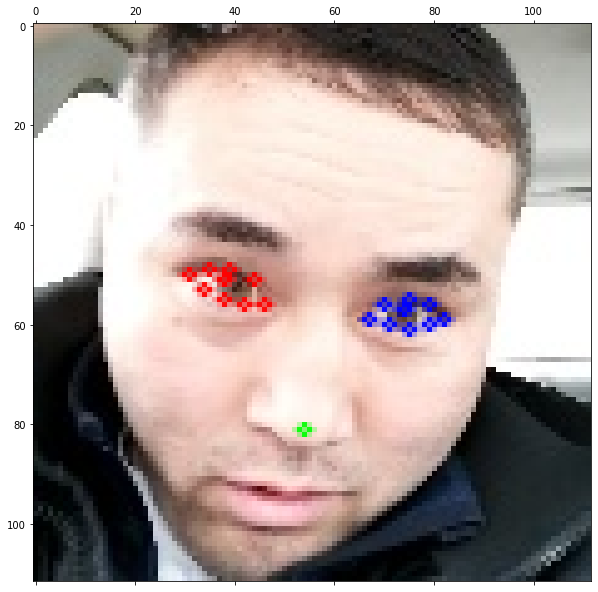

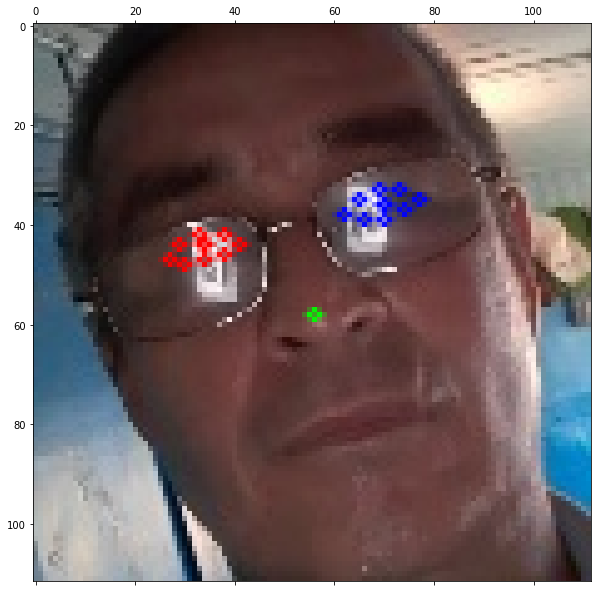

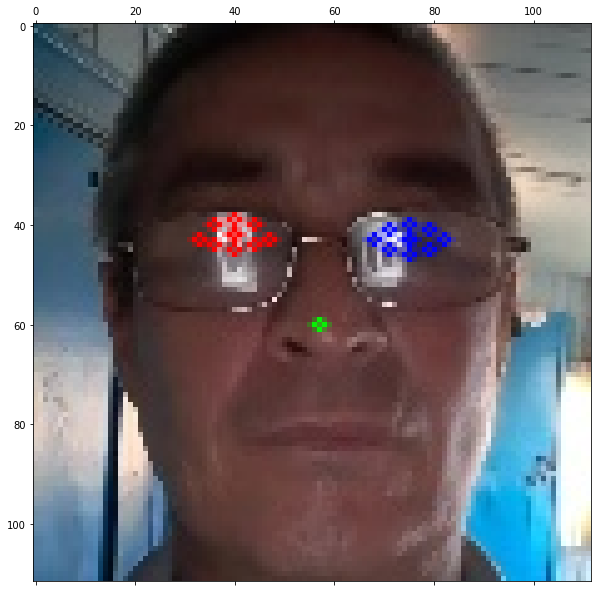

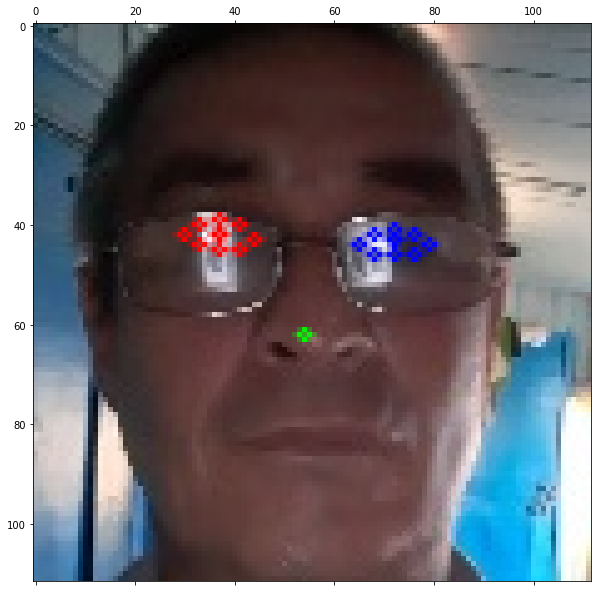

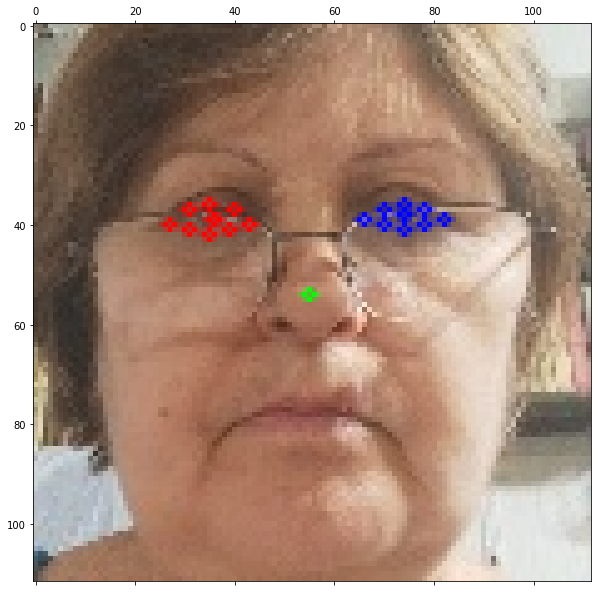

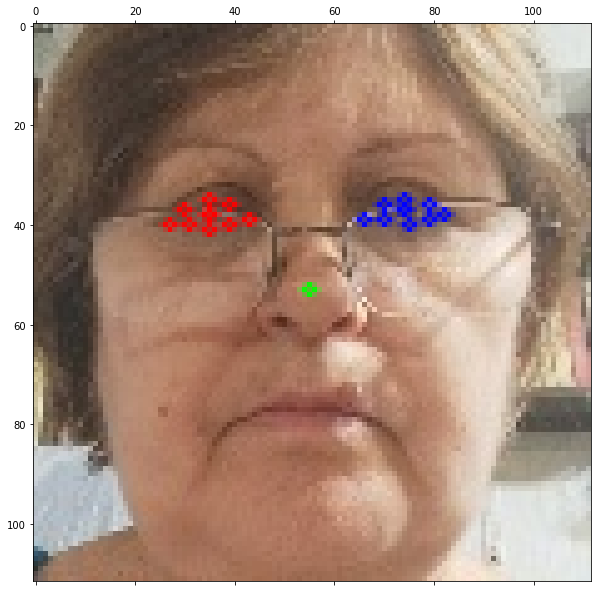

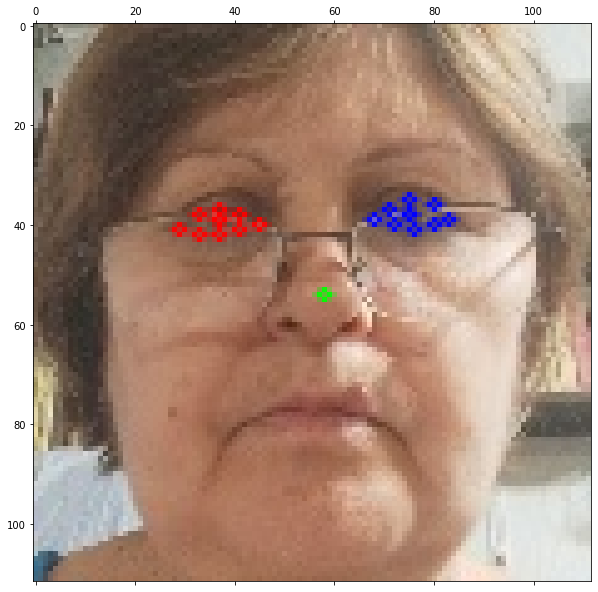

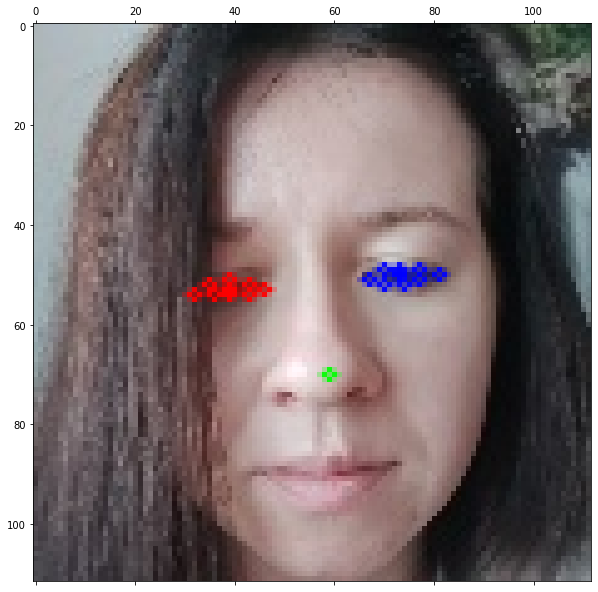

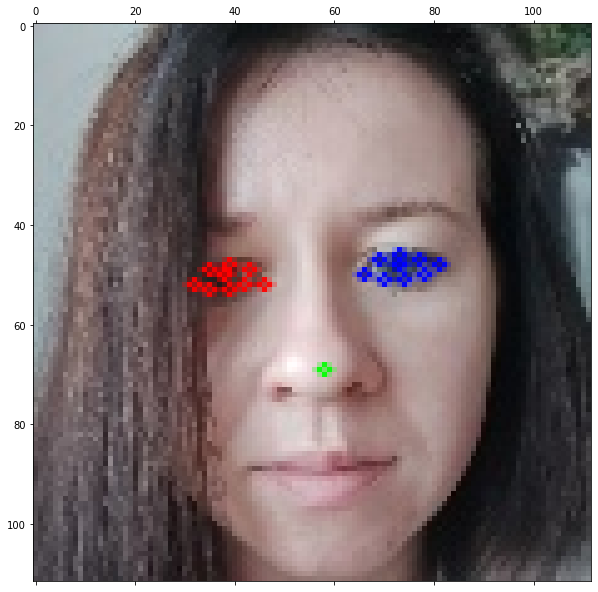

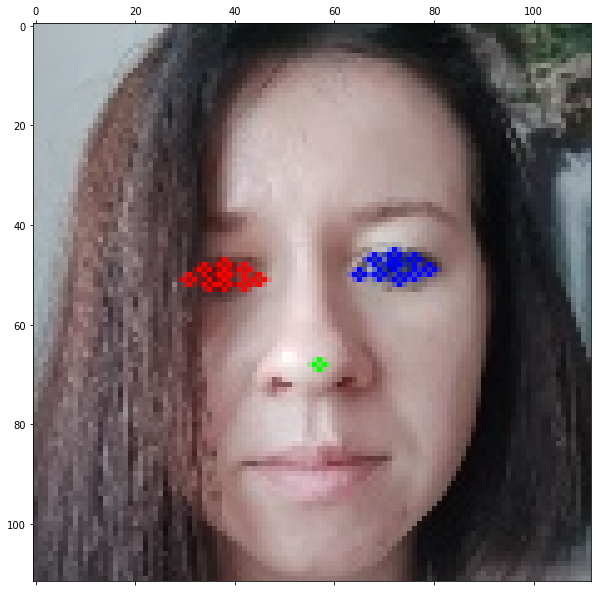

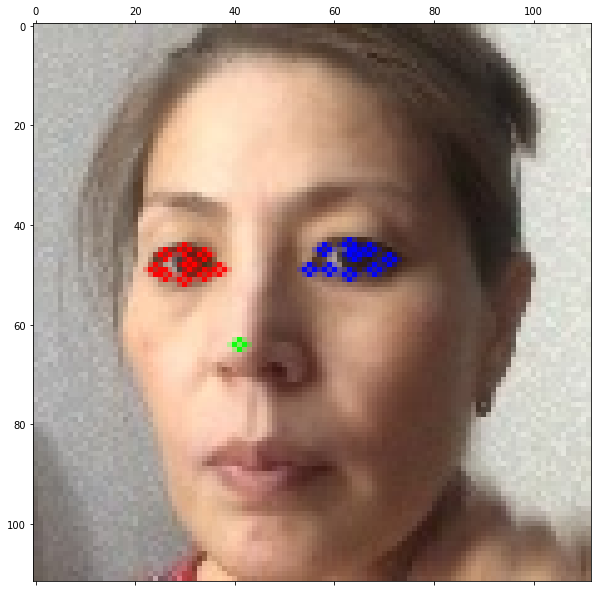

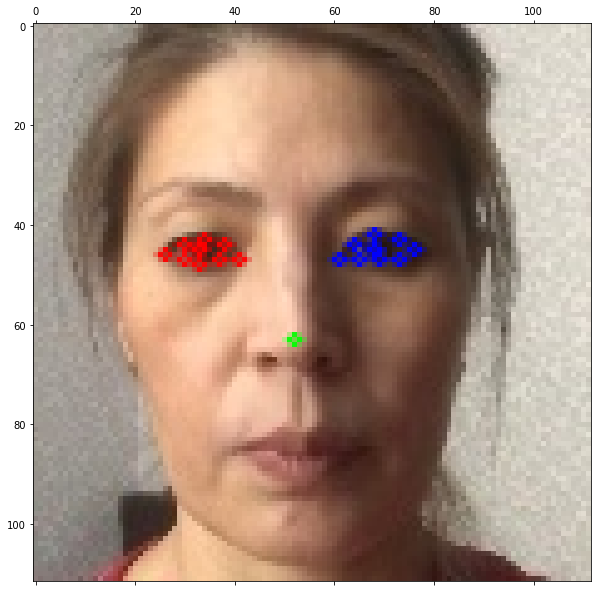

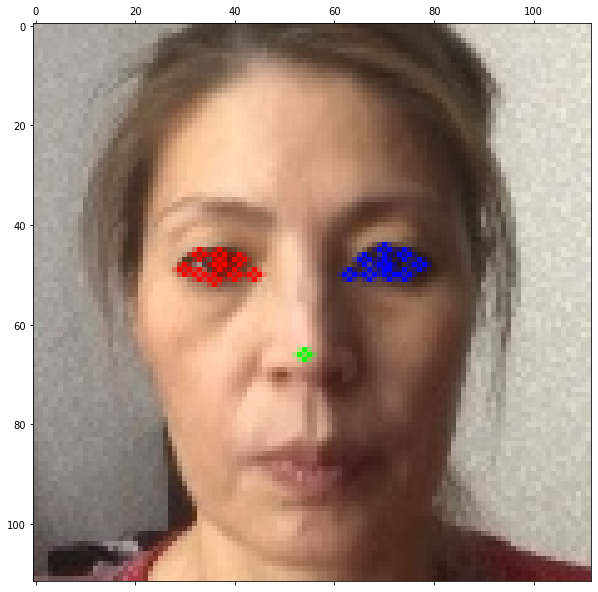

AssertionError: 

In [4]:
app = FaceAnalysis(allowed_modules=['detection', 'landmark_2d_106'])
app.prepare(ctx_id=0, det_size=(128, 128))
def lmk_coord(image_file):
    img = cv2.imread(image_file)
    faces = app.get(img)
    if len(faces)==1:
        for face in faces:
            lmk = face.landmark_2d_106
            lmk = np.round(lmk).astype(np.int)
    else:
        lmk = -1
    return lmk
    
def check_landm(basename, left_eye, right_eye, centre_nose):
    plt.rcParams['figure.figsize'] = [10, 10]
    nose_left_right = True
    display = True

    if nose_left_right:    
        color = (255, 0, 0)
        color2 = (0, 0, 255)
        color3 = (0, 255, 0)

        img = cv2.imread(basename)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        for i in range(left_eye.shape[0]):
            p = tuple(left_eye[i])
            cv2.circle(img, p, 1, color, 1, cv2.LINE_AA)
            #cv2.putText(img, str(i), p, cv2.FONT_HERSHEY_SIMPLEX, 0.3, color2, 1)

        for i in range(right_eye.shape[0]):
            p = tuple(right_eye[i])
            cv2.circle(img, p, 1, color2, 1, cv2.LINE_AA)
            #cv2.putText(img, str(i), p, cv2.FONT_HERSHEY_SIMPLEX, 0.3, color, 1)
        p = tuple(centre_nose)
        cv2.circle(img, p, 1, color3, 1, cv2.LINE_AA)
        if display:
            plt.matshow(img)
            plt.show()
        #cv2.imwrite('./image.png', img)
        # 
def check_df(df):

    for index, row in df.iterrows():
        file = row['filename']
        print(index)
        lmk = lmk_coord(file)
        if lmk != -1:
            left_eye = lmk[33:52]
            right_eye = lmk[87:]
            centre_nose = lmk[86]

            left_brow = left_eye[-9:]
            right_brow = right_eye[-9:]    
            left_eye = left_eye[:-9]
            right_eye = right_eye[:-9]

            check_landm(file, left_eye, right_eye, centre_nose)
        else:
            continue
df_test = pd.read_csv('/home/yandex/igor/data_eyes/tags_57_71_const_genome_podium.csv', sep=';')
check_df(df_test)